In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

import pandas as pd
import os

import seaborn as sns
# Configuration globale pour l'affichage pandas
##pd.set_option('display.max_colwidth', None)
##pd.set_option('display.max_rows', 100)  # Optionnel : limite le nombre de lignes affichées

In [2]:
df_pp_raw_recipes = pd.read_csv("../Raw_recipes.csv", index_col=0)
df_pp_raw_recipes.head()

,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
name,,,,,,,,,,,
arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [3]:
# conversion de la colonne submitted à datetime
df_pp_raw_recipes["submitted"] = pd.to_datetime(df_pp_raw_recipes["submitted"])
df_pp_raw_recipes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231637 entries, arriba   baked winter squash mexican style to cookies by design   sugar shortbread cookies
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              231637 non-null  int64         
 1   minutes         231637 non-null  int64         
 2   contributor_id  231637 non-null  int64         
 3   submitted       231637 non-null  datetime64[ns]
 4   tags            231637 non-null  object        
 5   nutrition       231637 non-null  object        
 6   n_steps         231637 non-null  int64         
 7   steps           231637 non-null  object        
 8   description     226658 non-null  object        
 9   ingredients     231637 non-null  object        
 10  n_ingredients   231637 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 21.2+ MB


In [4]:
# imputation valeur description
df_pp_raw_recipes["description"] = df_pp_raw_recipes["description"].fillna(
    "No_description"
)

print(df_pp_raw_recipes["description"].isna().sum())
print("missing values recipes:", df_pp_raw_recipes.isnull().sum())

0
missing values recipes: id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
dtype: int64


In [5]:
print("Total number of missing values recipes:", df_pp_raw_recipes.isnull().sum().sum())
print("missing values recipes:", df_pp_raw_recipes.isnull().sum())

print(df_pp_raw_recipes.isna().mean() * 100)

Total number of missing values recipes: 0
missing values recipes: id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
dtype: int64
id                0.0
minutes           0.0
contributor_id    0.0
submitted         0.0
tags              0.0
nutrition         0.0
n_steps           0.0
steps             0.0
description       0.0
ingredients       0.0
n_ingredients     0.0
dtype: float64


In [6]:
df_pp_raw_recipes.describe()

,id,minutes,contributor_id,submitted,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,2006-11-14 01:58:34.925508096,9.765499,9.051153
min,38.000000,0.000000e+00,2.700000e+01,1999-08-06 00:00:00,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,2004-09-16 00:00:00,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,2007-01-23 00:00:00,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,2008-10-29 00:00:00,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,2018-12-04 00:00:00,145.000000,43.000000
std,141206.635626,4.461963e+06,9.979141e+07,NaN,5.995128,3.734796


In [7]:
print("nbr d'ingrédients moyen:", df_pp_raw_recipes["n_ingredients"].mean())
print("nbr de steps moyen:", df_pp_raw_recipes["n_steps"].mean())
print("nbr de minutes moyen:", df_pp_raw_recipes["minutes"].mean())

nbr d'ingrédients moyen: 9.051153313158087
nbr de steps moyen: 9.7654994668382
nbr de minutes moyen: 9398.546009488984


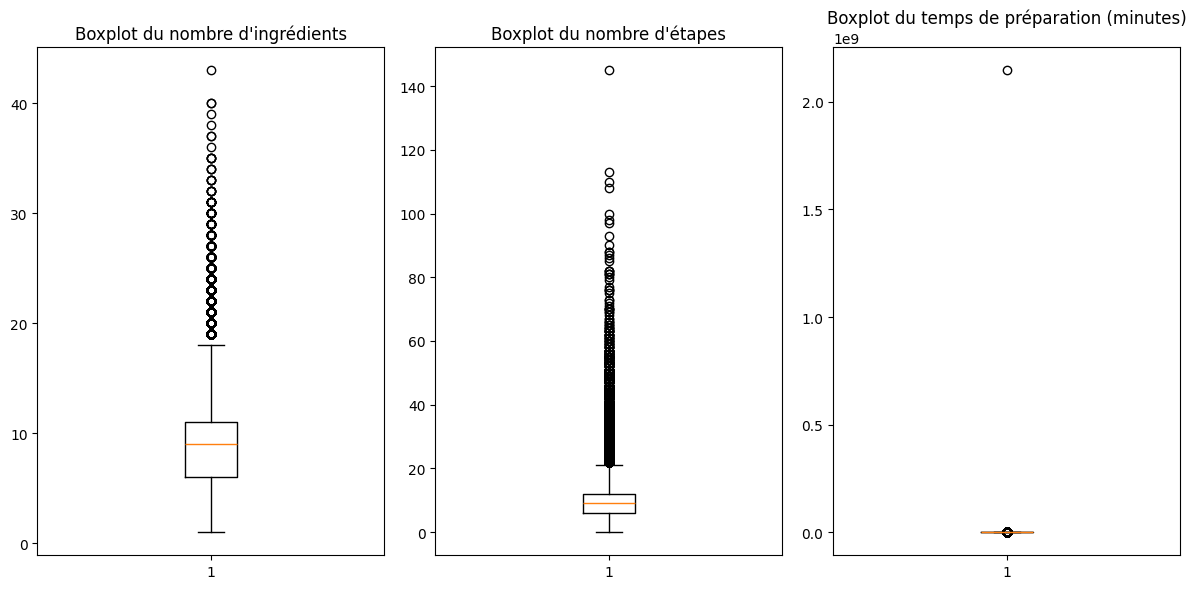

In [8]:
#visualisation des valeurs extrêmes, boxplot  sur n_ingredients, n_steps, minutes
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.boxplot(df_pp_raw_recipes["n_ingredients"])
plt.title("Boxplot du nombre d'ingrédients")

plt.subplot(1, 3, 2)
plt.boxplot(df_pp_raw_recipes["n_steps"])
plt.title("Boxplot du nombre d'étapes")

plt.subplot(1, 3, 3)
plt.boxplot(df_pp_raw_recipes["minutes"])
plt.title("Boxplot du temps de préparation (minutes)")

plt.tight_layout()
plt.show()

In [9]:
# Suppression des outliers dans la colonne 'minutes'
idx = df_pp_raw_recipes.index[
    (df_pp_raw_recipes["minutes"] == df_pp_raw_recipes["minutes"].max())
].tolist()

df_pp_raw_recipes_cleaned = df_pp_raw_recipes.drop(idx)

print(
    "max minutes after removing the max value:",
    df_pp_raw_recipes_cleaned["minutes"].max(),
)
# max en jours :
print(
    "max minutes in days:", df_pp_raw_recipes_cleaned["minutes"].max() / 60 / 24, "days"
)

max minutes after removing the max value: 1051200
max minutes in days: 730.0 days


In [10]:
## Nutrition score processing

df_pp_raw_recipes_cleaned[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = df_pp_raw_recipes_cleaned.nutrition.str.split(",",expand=True)
df_pp_raw_recipes_cleaned['calories'] = df_pp_raw_recipes_cleaned['calories'].apply(lambda x: x.replace('[','')) 
df_pp_raw_recipes_cleaned['carbohydrates'] = df_pp_raw_recipes_cleaned['carbohydrates'].apply(lambda x: x.replace(']','')) 

df_pp_raw_recipes_cleaned.head()


,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates
name,,,,,,,,,,,,,,,,,,
arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [11]:
# conversion des colonnes nutrition en float
nutrition_cols = ['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']
df_pp_raw_recipes_cleaned[nutrition_cols] = df_pp_raw_recipes_cleaned[nutrition_cols].astype(float)
df_pp_raw_recipes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231636 entries, arriba   baked winter squash mexican style to cookies by design   sugar shortbread cookies
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              231636 non-null  int64         
 1   minutes         231636 non-null  int64         
 2   contributor_id  231636 non-null  int64         
 3   submitted       231636 non-null  datetime64[ns]
 4   tags            231636 non-null  object        
 5   nutrition       231636 non-null  object        
 6   n_steps         231636 non-null  int64         
 7   steps           231636 non-null  object        
 8   description     231636 non-null  object        
 9   ingredients     231636 non-null  object        
 10  n_ingredients   231636 non-null  int64         
 11  calories        231636 non-null  float64       
 12  total fat       231636 non-null  float64       
 13  sugar          

In [12]:
df_pp_raw_recipes_cleaned.shape

(231636, 18)

Text(0.5, 1.0, 'Boxplot des calories')

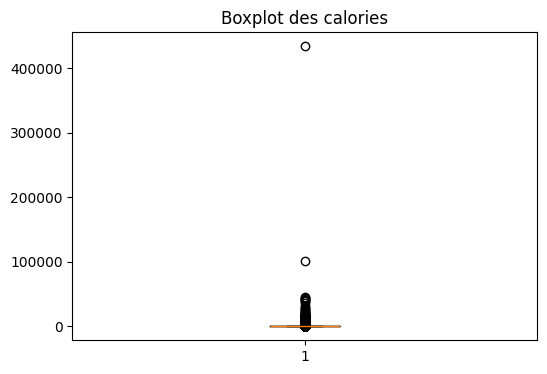

In [13]:
#recherche des outliers dans la colonne calories
plt.figure(figsize=(6, 4))
plt.boxplot(df_pp_raw_recipes_cleaned["calories"])
plt.title("Boxplot des calories")

In [14]:
#% de recettes avec calories > 5000 en fonction du nombre d'ingrédients
high_calorie_threshold = 5000
high_calorie_recipes = df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned["calories"] > high_calorie_threshold]
percentage_high_calorie = (len(high_calorie_recipes) / len(df_pp_raw_recipes_cleaned)) * 100
print(f"Pourcentage de recettes avec plus de {high_calorie_threshold} calories: {percentage_high_calorie:.2f}%")

Pourcentage de recettes avec plus de 5000 calories: 0.45%


In [15]:
#suppression des recettes avec calories > 5000
df_pp_raw_recipes_cleaned = df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned["calories"] <= high_calorie_threshold]
print("Shape after removing high calorie recipes:", df_pp_raw_recipes_cleaned.shape)    

Shape after removing high calorie recipes: (230587, 18)


Text(0.5, 1.0, 'Boxplot des calories')

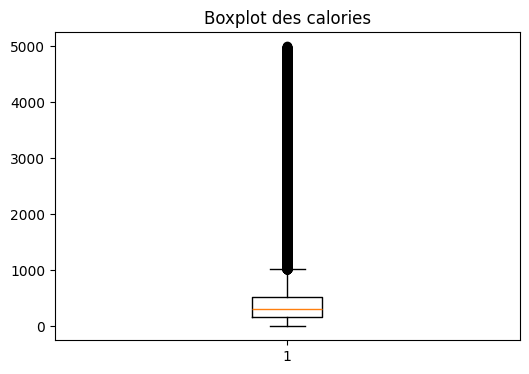

In [16]:
#recherche des outliers dans la colonne calories
plt.figure(figsize=(6, 4))
plt.boxplot(df_pp_raw_recipes_cleaned["calories"])
plt.title("Boxplot des calories")

Text(0.5, 1.0, 'Boxplot des sugar')

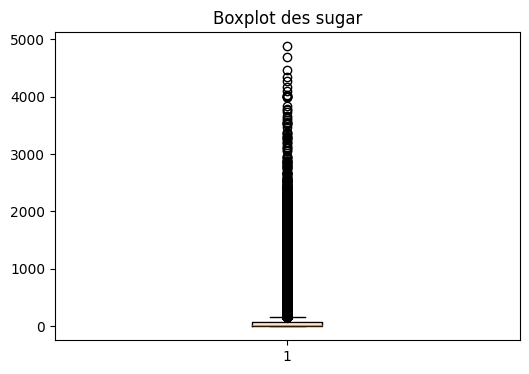

In [17]:
#recherche des outliers dans la colonne sugar
plt.figure(figsize=(6, 4))
plt.boxplot(df_pp_raw_recipes_cleaned["sugar"])
plt.title("Boxplot des sugar")

In [18]:
#pourcentage de recettes avec sugar > 1000
high_sugar_threshold = 1000
high_sugar_recipes = df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned["sugar"] > high_sugar_threshold]
percentage_high_sugar = (len(high_sugar_recipes) / len(df_pp_raw_recipes_cleaned)) * 100
print(f"Pourcentage de recettes avec plus de {high_sugar_threshold}g de sucre: {percentage_high_sugar:.2f}%")   

Pourcentage de recettes avec plus de 1000g de sucre: 0.88%


In [19]:
#suppression des recettes avec sucres > 1000    
df_pp_raw_recipes_cleaned = df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned["sugar"] <= high_sugar_threshold]
print("Shape after removing high sugar recipes:", df_pp_raw_recipes_cleaned.shape)

Shape after removing high sugar recipes: (228569, 18)


Text(0.5, 1.0, 'Boxplot des protéines')

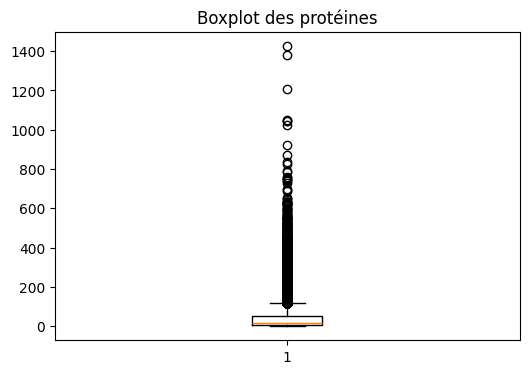

In [20]:
#analyse des outliers pour la variable protéines
plt.figure(figsize=(6, 4))
plt.boxplot(df_pp_raw_recipes_cleaned["protein"])
plt.title("Boxplot des protéines")  

In [21]:
#pourcentage de recettes avec proteines > 1000
high_protein_threshold = 1000
high_protein_recipes = df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned["protein"] > high_protein_threshold]
percentage_high_protein = (len(high_protein_recipes) / len(df_pp_raw_recipes_cleaned)) * 100
print(f"Pourcentage de recettes avec plus de {high_protein_threshold}g de protéines: {percentage_high_protein:.4f}%")

Pourcentage de recettes avec plus de 1000g de protéines: 0.0031%


In [22]:
#suppression des outliers dans la colonne 'protein'
df_pp_raw_recipes_cleaned = df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned["protein"] <= high_protein_threshold]
print("Shape after removing high protein recipes:", df_pp_raw_recipes_cleaned.shape)

Shape after removing high protein recipes: (228562, 18)


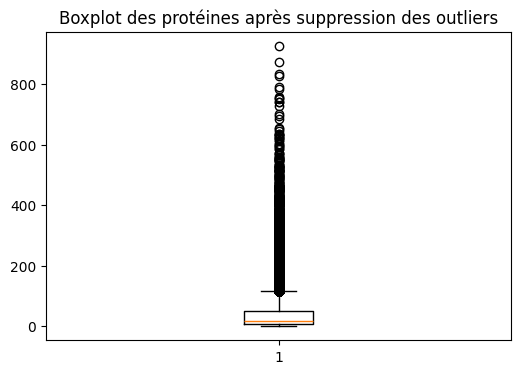

In [23]:
#boxplot proteines après suppression des outliers
plt.figure(figsize=(6, 4))
plt.boxplot(df_pp_raw_recipes_cleaned["protein"])
plt.title("Boxplot des protéines après suppression des outliers")
plt.show()

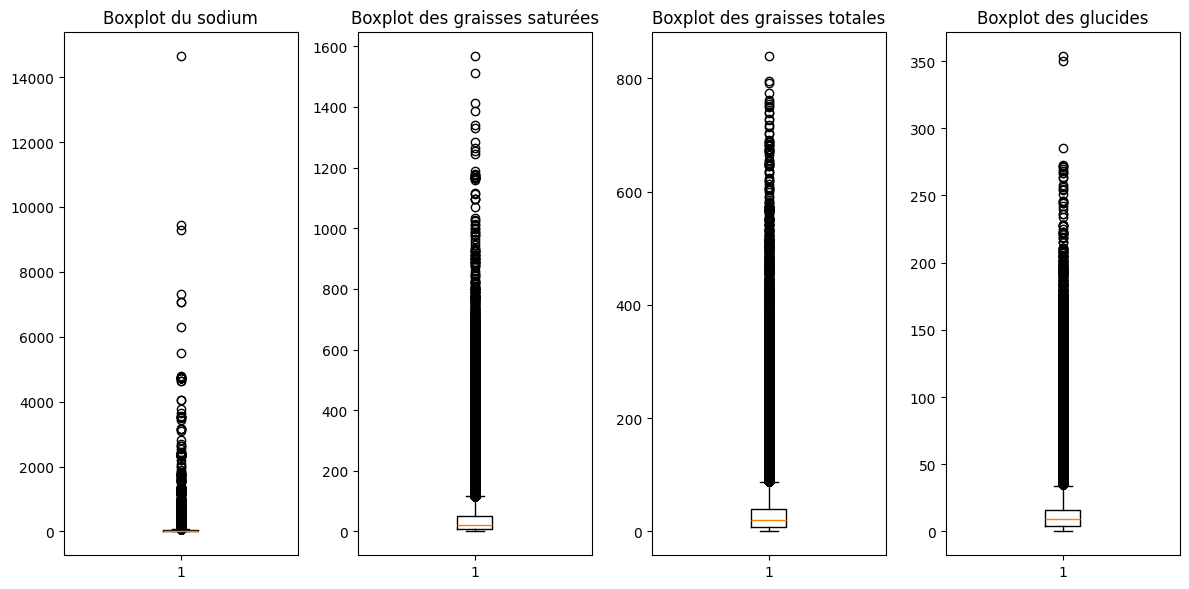

In [24]:
#boxplot sur le meme graphique des colonnes sodium, saturated fat, total fat, carbohydrates
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.boxplot(df_pp_raw_recipes_cleaned["sodium"])
plt.title("Boxplot du sodium")
plt.subplot(1, 4, 2)
plt.boxplot(df_pp_raw_recipes_cleaned["saturated fat"])
plt.title("Boxplot des graisses saturées")
plt.subplot(1, 4, 3)
plt.boxplot(df_pp_raw_recipes_cleaned["total fat"])
plt.title("Boxplot des graisses totales")
plt.subplot(1, 4, 4)
plt.boxplot(df_pp_raw_recipes_cleaned["carbohydrates"])
plt.title("Boxplot des glucides")
plt.tight_layout()
plt.show()

In [25]:
#Pourcentage de recette avec sodium > 1000
high_sodium_threshold = 1000
high_sodium_recipes = df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned["sodium"] > high_sodium_threshold]
percentage_high_sodium = (len(high_sodium_recipes) / len(df_pp_raw_recipes_cleaned)) * 100
print(f"Pourcentage de recettes avec plus de {high_sodium_threshold}mg de sodium : {percentage_high_sodium:.2f}%")

Pourcentage de recettes avec plus de 1000mg de sodium : 0.09%


In [26]:
#suppression des recettes avec sodium > 1000
df_pp_raw_recipes_cleaned = df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned["sodium"] <= high_sodium_threshold]
df_pp_raw_recipes_cleaned = df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned["total fat"] <= high_sodium_threshold]
df_pp_raw_recipes_cleaned = df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned["carbohydrates"] <= high_sodium_threshold]
df_pp_raw_recipes_cleaned = df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned["saturated fat"] <= high_sodium_threshold]
print("Shape after removing high sodium, total fat, carbohydrates, saturated fat recipes:", df_pp_raw_recipes_cleaned.shape)

Shape after removing high sodium, total fat, carbohydrates, saturated fat recipes: (228310, 18)


**ANALYSE SUR LES CONTRIBUTEURS**

In [27]:
# Analyse de l'unicité des contributeurs
print("=== ANALYSE DES CONTRIBUTEURS ===")


    # Statistiques générales sur les contributeurs
total_recipes = len(df_pp_raw_recipes)
unique_contributors = df_pp_raw_recipes["contributor_id"].nunique()

print(f"Nombre total de recettes: {total_recipes}")
print(f"Nombre de contributeurs uniques: {unique_contributors}")
print(
    f"Moyenne de recettes par contributeur: {total_recipes/unique_contributors:.2f}"
)
# Distribution du nombre de recettes par contributeur
contributor_counts = df_pp_raw_recipes["contributor_id"].value_counts()

print(f"\nDistribution des contributions:")
print(
    f"  Contributeurs avec 1 seule recette: {(contributor_counts == 1).sum()} ({(contributor_counts == 1).sum()/unique_contributors*100:.1f}%)"
)
print(
    f"  Contributeurs avec 2-5 recettes: {((contributor_counts >= 2) & (contributor_counts <= 5)).sum()}"
)
print(
    f"  Contributeurs avec 6-10 recettes: {((contributor_counts >= 6) & (contributor_counts <= 10)).sum()}"
)
print(f"  Contributeurs avec >10 recettes: {(contributor_counts > 10).sum()}")

    # Top contributeurs
print(f"\nTop 10 contributeurs les plus actifs:")
print(contributor_counts.head(10))

    # Statistiques descriptives
print(f"\nStatistiques du nombre de recettes par contributeur:")
print(f"  Médiane: {contributor_counts.median():.0f}")
print(f"  Moyenne: {contributor_counts.mean():.2f}")
print(f"  Maximum: {contributor_counts.max()}")


=== ANALYSE DES CONTRIBUTEURS ===
Nombre total de recettes: 231637
Nombre de contributeurs uniques: 27926
Moyenne de recettes par contributeur: 8.29

Distribution des contributions:
  Contributeurs avec 1 seule recette: 15339 (54.9%)
  Contributeurs avec 2-5 recettes: 7767
  Contributeurs avec 6-10 recettes: 1972
  Contributeurs avec >10 recettes: 2848

Top 10 contributeurs les plus actifs:
contributor_id
89831     3118
37779     2553
37449     2493
1533      1595
58104     1522
169430    1378
4470      1125
80353     1104
283251    1004
21752      971
Name: count, dtype: int64

Statistiques du nombre de recettes par contributeur:
  Médiane: 1
  Moyenne: 8.29
  Maximum: 3118


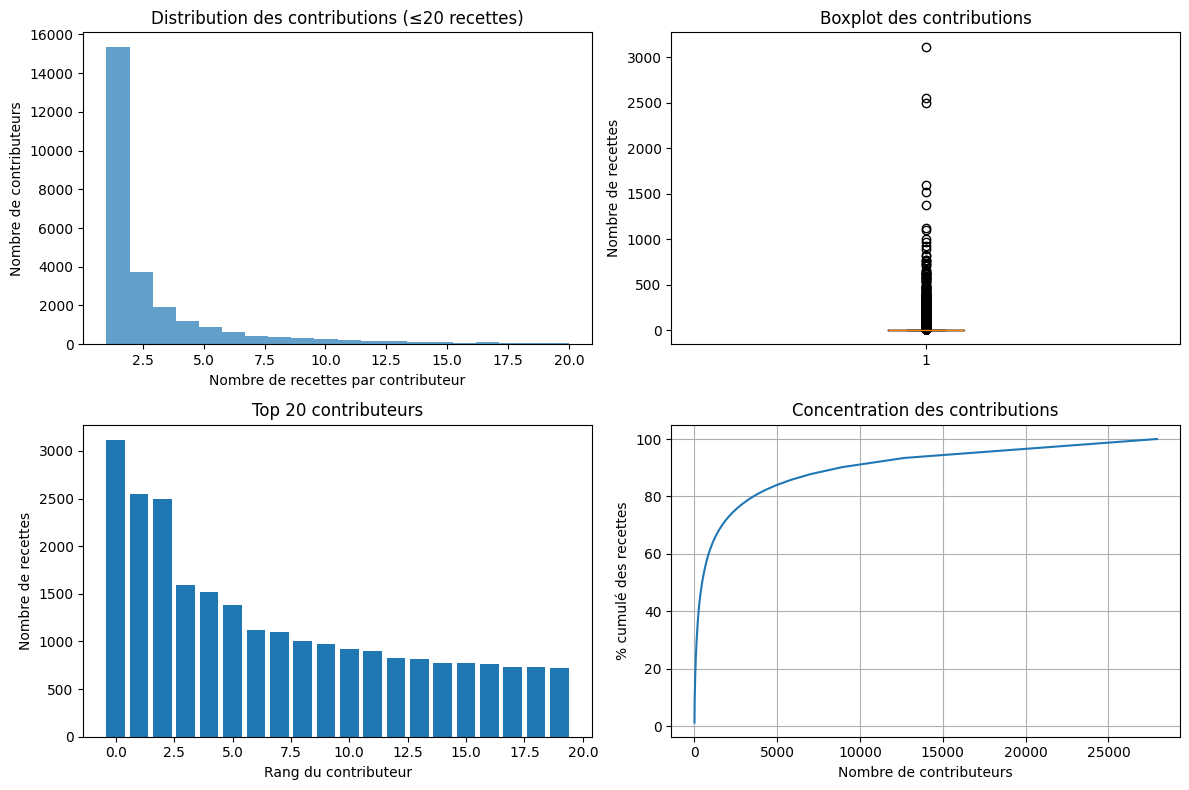


Analyse de concentration:
  Top 20% des contributeurs (5585) produisent 197618 recettes
  Soit 85.3% de toutes les recettes


In [28]:


# Visualisation
plt.figure(figsize=(12, 8))

# Histogramme des contributions (limité pour la lisibilité)
plt.subplot(2, 2, 1)
contributor_counts_limited = contributor_counts[contributor_counts <= 20]
plt.hist(contributor_counts_limited, bins=20, alpha=0.7)
plt.xlabel("Nombre de recettes par contributeur")
plt.ylabel("Nombre de contributeurs")
plt.title("Distribution des contributions (≤20 recettes)")

# Boxplot
plt.subplot(2, 2, 2)
plt.boxplot(contributor_counts)
plt.ylabel("Nombre de recettes")
plt.title("Boxplot des contributions")

# Top 20 contributeurs
plt.subplot(2, 2, 3)
top_20 = contributor_counts.head(20)
plt.bar(range(len(top_20)), top_20.values)
plt.xlabel("Rang du contributeur")
plt.ylabel("Nombre de recettes")
plt.title("Top 20 contributeurs")

# Courbe cumulative
plt.subplot(2, 2, 4)
cumsum_recipes = contributor_counts.sort_values(ascending=False).cumsum()
plt.plot(
    range(1, len(cumsum_recipes) + 1), cumsum_recipes.values / total_recipes * 100
)
plt.xlabel("Nombre de contributeurs")
plt.ylabel("% cumulé des recettes")
plt.title("Concentration des contributions")
plt.grid(True)

plt.tight_layout()
plt.show()

# Analyse de concentration (principe de Pareto)
top_20_percent = int(unique_contributors * 0.2)
recipes_by_top_20_percent = contributor_counts.head(top_20_percent).sum()
print(f"\nAnalyse de concentration:")
print(
    f"  Top 20% des contributeurs ({top_20_percent}) produisent {recipes_by_top_20_percent} recettes"
)
print(
    f"  Soit {recipes_by_top_20_percent/total_recipes*100:.1f}% de toutes les recettes"
)


**NOMBRE DE MINUTES**

In [29]:
print(f"   Type de données: {df_pp_raw_recipes_cleaned['minutes'].dtype}")
print(f"   Nombre total d'observations: {len(df_pp_raw_recipes_cleaned)}")
print(f"   Nombre de valeurs manquantes: {df_pp_raw_recipes_cleaned['minutes'].isnull().sum()}")
print(f"   Pourcentage de valeurs manquantes: {df_pp_raw_recipes_cleaned['minutes'].isnull().sum()/len(df_pp_raw_recipes_cleaned)*100:.2f}%")

   Type de données: int64
   Nombre total d'observations: 228310
   Nombre de valeurs manquantes: 0
   Pourcentage de valeurs manquantes: 0.00%


In [30]:
# 2. Statistiques descriptives
print("\n2. STATISTIQUES DESCRIPTIVES")
print(df_pp_raw_recipes_cleaned['minutes'].describe())



2. STATISTIQUES DESCRIPTIVES
count    2.283100e+05
mean     1.194346e+02
std      2.841402e+03
min      0.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      6.500000e+01
max      1.051200e+06
Name: minutes, dtype: float64


In [31]:
# valeur max et valeur min minutes
print("max minutes:", df_pp_raw_recipes_cleaned["minutes"].max())
print("min minutes:", df_pp_raw_recipes_cleaned["minutes"].min())

max minutes: 1051200
min minutes: 0


In [32]:
#check combien de valeurs supérieure à 1 mois (43200 minutes)
print("Nombre de valeurs > 1 mois (43200 min):", len(df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned["minutes"] > 43200]))
print("% de valeurs > 1 mois (43200 min):", len(df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned["minutes"] > 43200])/len(df_pp_raw_recipes_cleaned)*100)

Nombre de valeurs > 1 mois (43200 min): 55
% de valeurs > 1 mois (43200 min): 0.024090052998116597


In [33]:
#Dispersion des données
print(f"   Variance: {df_pp_raw_recipes_cleaned['minutes'].var():.2f}")
print(f"   Écart-type: {df_pp_raw_recipes_cleaned['minutes'].std():.2f}")

   Variance: 8073567.87
   Écart-type: 2841.40


In [34]:
#étude des quartiles 0.25 0.5 0.75
print("1er quartile (25%):", df_pp_raw_recipes_cleaned["minutes"].quantile(0.25))
print("2e quartile (50%):", df_pp_raw_recipes_cleaned["minutes"].quantile(0.50))
print("3e quartile (75%):", df_pp_raw_recipes_cleaned["minutes"].quantile(0.75))

1er quartile (25%): 20.0
2e quartile (50%): 40.0
3e quartile (75%): 65.0


In [35]:
# nombre de recettes avec le min de minutes
df_pp_raw_recipes.loc[
    df_pp_raw_recipes["minutes"] == df_pp_raw_recipes["minutes"].min()
].shape
print(
    "nombre de recettes avec 0 minutes:",
    df_pp_raw_recipes.loc[
        df_pp_raw_recipes["minutes"] == df_pp_raw_recipes["minutes"].min()
    ].shape,
)

df_pp_raw_recipes.loc[
    df_pp_raw_recipes["minutes"] == df_pp_raw_recipes["minutes"].max()
].shape
print(
    "nombre de recettes avec le max de minutes:",
    df_pp_raw_recipes.loc[
        df_pp_raw_recipes["minutes"] == df_pp_raw_recipes["minutes"].max()
    ].shape,
)

nombre de recettes avec 0 minutes: (1094, 11)
nombre de recettes avec le max de minutes: (1, 11)


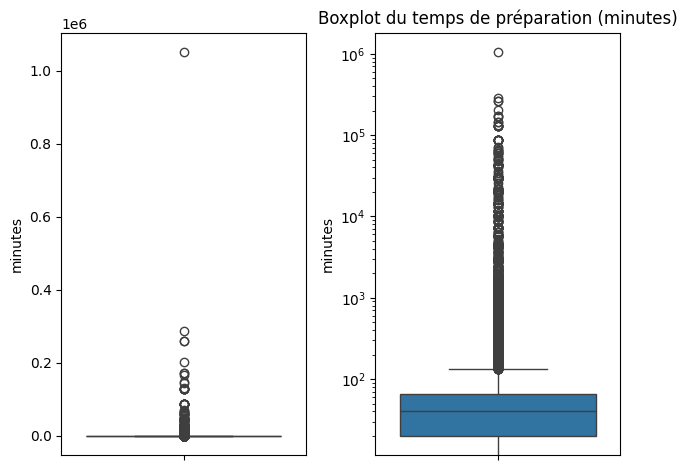

In [36]:
f, axes = plt.subplots(1, 2)
sns.boxplot(df_pp_raw_recipes_cleaned['minutes'], ax=axes[0])
sns.boxplot(df_pp_raw_recipes_cleaned['minutes'], ax=axes[1])
axes[1].set_yscale('log')

#plt.figure(figsize=(12, 6))
plt.title("Boxplot du temps de préparation (minutes)")

plt.tight_layout()
plt.show()

In [37]:
# Mesures d'asymétrie et de kurtosis pour la variable 'minutes'
skewness = df_pp_raw_recipes['minutes'].skew()
kurtosis = df_pp_raw_recipes['minutes'].kurtosis()
print(f"   Asymétrie (skewness): {skewness:.3f}")
print(f"   Aplatissement (kurtosis): {kurtosis:.3f}")


   Asymétrie (skewness): 481.287
   Aplatissement (kurtosis): 231636.798



5. CATÉGORISATION DES TEMPS DE PRÉPARATION
time_category
Moyen (31-60 min)        70077
Rapide (16-30 min)       55131
Très rapide (≤15 min)    43922
Long (1-2h)              36683
Extrême (>4h)            12969
Très long (2-4h)         12855
Name: count, dtype: int64

Pourcentages:
   Moyen (31-60 min): 30.3%
   Rapide (16-30 min): 23.8%
   Très rapide (≤15 min): 19.0%
   Long (1-2h): 15.8%
   Extrême (>4h): 5.6%
   Très long (2-4h): 5.5%

6. VISUALISATIONS


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Moyen (31-60 min)'),
  Text(1, 0, 'Rapide (16-30 min)'),
  Text(2, 0, 'Très rapide (≤15 min)'),
  Text(3, 0, 'Long (1-2h)'),
  Text(4, 0, 'Extrême (>4h)'),
  Text(5, 0, 'Très long (2-4h)')])

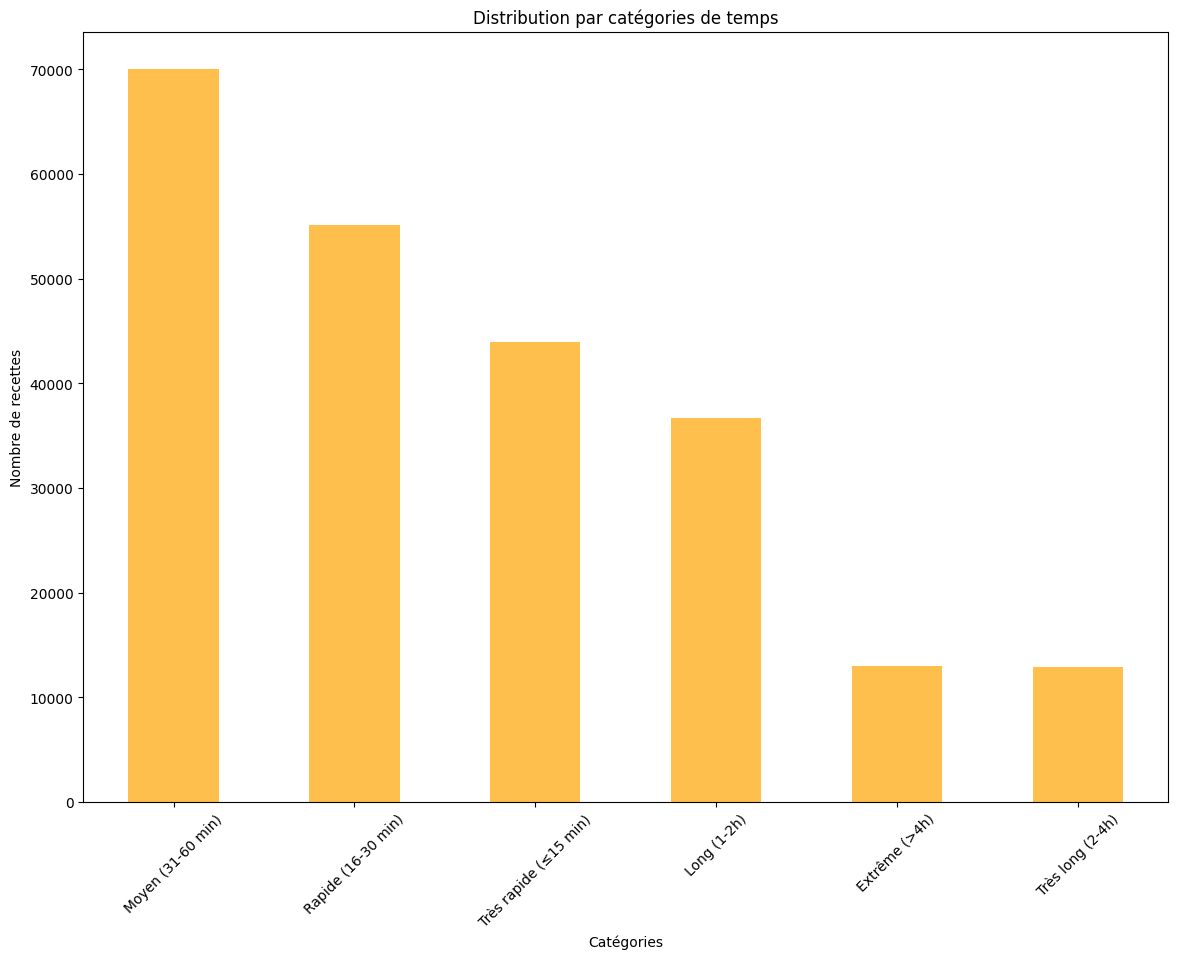

In [38]:
# 5. Catégorisation des temps
print("\n5. CATÉGORISATION DES TEMPS DE PRÉPARATION")
def categorize_cooking_time(minutes):
    if minutes <= 15:
        return "Très rapide (≤15 min)"
    elif minutes <= 30:
        return "Rapide (16-30 min)"
    elif minutes <= 60:
        return "Moyen (31-60 min)"
    elif minutes <= 120:
        return "Long (1-2h)"
    elif minutes <= 240:
        return "Très long (2-4h)"
    else:
        return "Extrême (>4h)"

df_temp = df_pp_raw_recipes.copy()
df_temp['time_category'] = df_temp['minutes'].apply(categorize_cooking_time)
time_distribution = df_temp['time_category'].value_counts()
print(time_distribution)
print(f"\nPourcentages:")
for category, count in time_distribution.items():
    print(f"   {category}: {count/len(df_temp)*100:.1f}%")

# 6. Visualisations
print("\n6. VISUALISATIONS")
plt.figure(figsize=(14, 10))


# Histogramme des catégories
time_distribution.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Distribution par catégories de temps')
plt.xlabel('Catégories')
plt.ylabel('Nombre de recettes')
plt.xticks(rotation=45)

**ETUDE DE LA VARIABLE INGREDIENT**

In [39]:
# Ingredients 
import ast

l_ingredient = list(df_pp_raw_recipes_cleaned.ingredients)
list_ingredient = []
for item in l_ingredient:
    item = ast.literal_eval(item)
    for i in item: 
        list_ingredient.append(i)

In [40]:
print('There are {} unique ingredients'.format(len(set(list_ingredient))))

There are 14879 unique ingredients


In [41]:
from collections import Counter
element_counts = Counter(list_ingredient)
top_five = element_counts.most_common(10)
print(top_five,"\n")

[('salt', 84395), ('butter', 53688), ('sugar', 42855), ('onion', 39012), ('water', 34184), ('olive oil', 32762), ('eggs', 32503), ('garlic cloves', 25676), ('flour', 25496), ('milk', 25307)] 



In [42]:
# Ingrédients de base communs
basic_ingredients = ['salt', 'pepper', 'water', 'oil', 'butter', 'flour', 'sugar', 
                    'onion', 'garlic', 'olive oil', 'black pepper', 'vegetable oil']

# Protéines
proteins = ['chicken', 'beef', 'pork', 'fish', 'eggs', 'cheese', 'milk', 'cream',
           'chicken breast', 'ground beef', 'bacon', 'ham', 'turkey', 'salmon']

# Légumes
vegetables = ['onion', 'garlic', 'tomato', 'carrots', 'celery', 'potatoes', 
             'bell pepper', 'mushrooms', 'spinach', 'broccoli']

# Épices et herbes
spices_herbs = ['salt', 'pepper', 'black pepper', 'paprika', 'cumin', 'oregano',
               'basil', 'thyme', 'rosemary', 'parsley', 'cinnamon']

def categorize_ingredient(ingredient_name):
    ingredient_lower = ingredient_name.lower()
    if any(basic in ingredient_lower for basic in basic_ingredients):
        return 'Basic'
    elif any(protein in ingredient_lower for protein in proteins):
        return 'Protein'
    elif any(veg in ingredient_lower for veg in vegetables):
        return 'Vegetable'
    elif any(spice in ingredient_lower for spice in spices_herbs):
        return 'Spice/Herb'
    else:
        return 'Other'
# Catégoriser les top 100 ingrédients
top_100 = element_counts.most_common(100)
categories = {}
for ingredient, count in top_100:
    category = categorize_ingredient(ingredient)
    if category not in categories:
        categories[category] = []
    categories[category].append((ingredient, count))

print("Distribution par catégories (top 100 ingrédients):")
for category, items in categories.items():
    total_count = sum(count for _, count in items)
    print(f"  {category}: {len(items)} ingrédients, {total_count} utilisations")

Distribution par catégories (top 100 ingrédients):
  Basic: 36 ingrédients, 586814 utilisations
  Protein: 13 ingrédients, 141810 utilisations
  Other: 32 ingrédients, 223770 utilisations
  Spice/Herb: 12 ingrédients, 71107 utilisations
  Vegetable: 7 ingrédients, 47107 utilisations


In [43]:
# 4. Analyse des ingrédients rares
print("\n4. ANALYSE DES INGRÉDIENTS RARES")
rare_ingredients = [ingredient for ingredient, count in element_counts.items() if count == 1]
very_rare = [ingredient for ingredient, count in element_counts.items() if count <= 5]

print(f"Ingrédients utilisés une seule fois: {len(rare_ingredients)} ({len(rare_ingredients)/len(element_counts)*100:.1f}%)")
print(f"Ingrédients utilisés ≤5 fois: {len(very_rare)} ({len(very_rare)/len(element_counts)*100:.1f}%)")

# Exemples d'ingrédients rares
print(f"\nExemples d'ingrédients rares:")
print(rare_ingredients[:10])


4. ANALYSE DES INGRÉDIENTS RARES
Ingrédients utilisés une seule fois: 3539 (23.8%)
Ingrédients utilisés ≤5 fois: 7478 (50.3%)

Exemples d'ingrédients rares:
['gentian root', 'scullcap herb', 'burnet root', 'wood bethony', 'chicken rice soup', 'coffee-mate cinnamon vanilla liquid creamer', 'diced tomatoes with chiles and cilantro', 'guacamole seasoning mix', 'turkey base', 'veat bites']


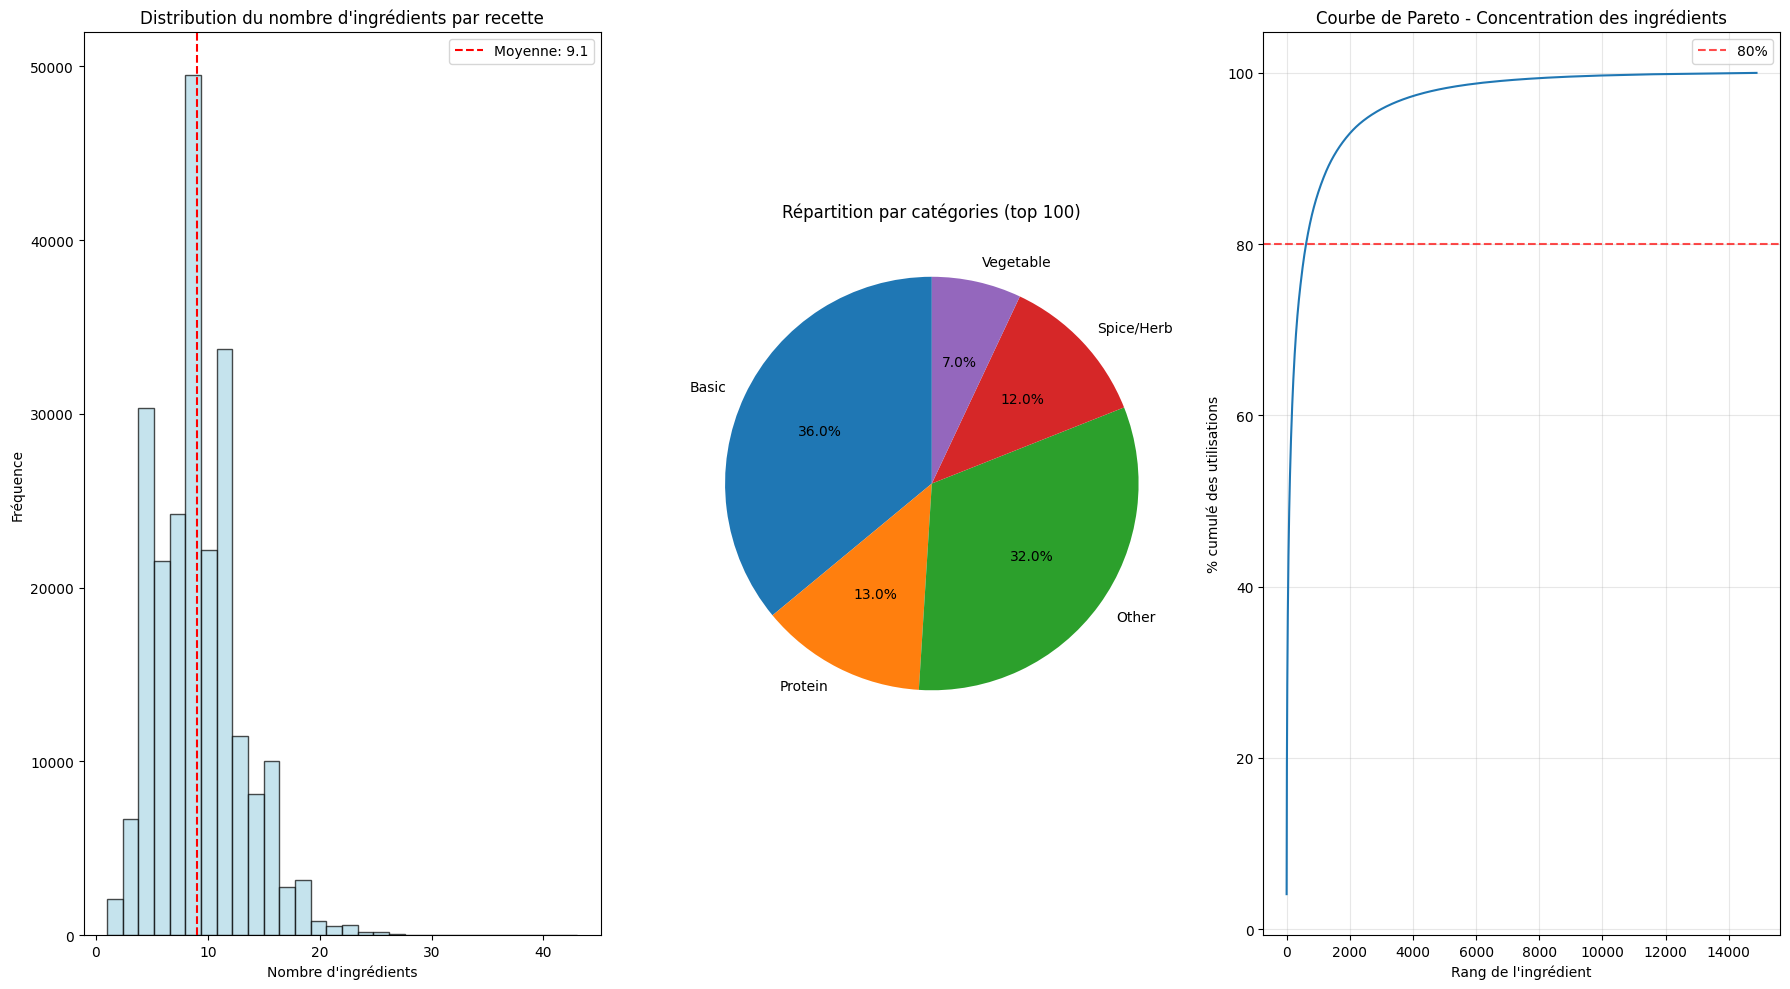

In [44]:
#visualisation graphique pour les ingrédients

# Nombre d'ingrédients par recette
ingredients_per_recipe = df_pp_raw_recipes_cleaned['ingredients'].apply(lambda x: len(ast.literal_eval(x)))

fig, axes = plt.subplots(1,3,figsize=(18,10))
# Distribution du nombre d'ingrédients par recette
axes[0].hist(ingredients_per_recipe, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0].set_title('Distribution du nombre d\'ingrédients par recette')
axes[0].set_xlabel('Nombre d\'ingrédients')
axes[0].set_ylabel('Fréquence')
axes[0].axvline(ingredients_per_recipe.mean(), color='red', linestyle='--', 
                   label=f'Moyenne: {ingredients_per_recipe.mean():.1f}')
axes[0].legend()

# Distribution par catégories
if categories:
    cat_names = list(categories.keys())
    cat_counts = [len(categories[cat]) for cat in cat_names]
    axes[1].pie(cat_counts, labels=cat_names, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Répartition par catégories (top 100)')

# Courbe de Pareto (fréquence cumulative)

frequencies_all = list(element_counts.values())
sorted_frequencies = sorted(frequencies_all, reverse=True)
cumulative_percent = np.cumsum(sorted_frequencies) / sum(sorted_frequencies) * 100
plt.subplot(1, 3, 3)
axes[2].plot(range(1, len(cumulative_percent) + 1), cumulative_percent)
axes[2].set_title('Courbe de Pareto - Concentration des ingrédients')
axes[2].set_xlabel('Rang de l\'ingrédient')
axes[2].set_ylabel('% cumulé des utilisations')
axes[2].grid(True, alpha=0.3)
axes[2].axhline(80, color='red', linestyle='--', alpha=0.7, label='80%')
axes[2].legend()

plt.tight_layout()
plt.show()

**ETUDE DE LA VARIABLE N_STEPS**

In [45]:
print(f"   Type de données: {df_pp_raw_recipes_cleaned['n_steps'].dtype}")
print(f"   Nombre total d'observations: {len(df_pp_raw_recipes_cleaned)}")
print(f"   Nombre de valeurs manquantes: {df_pp_raw_recipes_cleaned['n_steps'].isnull().sum()}")
print(f"   Pourcentage de valeurs manquantes: {df_pp_raw_recipes_cleaned['n_steps'].isnull().sum()/len(df_pp_raw_recipes_cleaned)*100:.2f}%")

   Type de données: int64
   Nombre total d'observations: 228310
   Nombre de valeurs manquantes: 0
   Pourcentage de valeurs manquantes: 0.00%


In [46]:
#statistiques descriptives
print("\n2. STATISTIQUES DESCRIPTIVES")
print(df_pp_raw_recipes_cleaned['n_steps'].describe())


2. STATISTIQUES DESCRIPTIVES
count    228310.00000
mean          9.74564
std           5.96506
min           0.00000
25%           6.00000
50%           9.00000
75%          12.00000
max         145.00000
Name: n_steps, dtype: float64


In [47]:
#min et max n_steps
print("max n_steps:", df_pp_raw_recipes_cleaned["n_steps"].max())
print("min n_steps:", df_pp_raw_recipes_cleaned["n_steps"].min())

max n_steps: 145
min n_steps: 0


In [48]:
#variance et écart-type
print(f"   Variance: {df_pp_raw_recipes_cleaned['n_steps'].var():.2f}")
print(f"   Écart-type: {df_pp_raw_recipes_cleaned['n_steps'].std():.2f}")

   Variance: 35.58
   Écart-type: 5.97


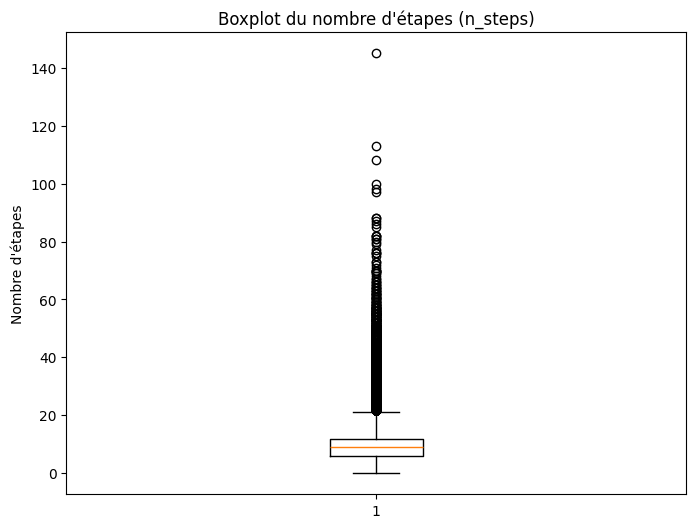

In [49]:
#boxplot n_steps
plt.figure(figsize=(8, 6))
plt.boxplot(df_pp_raw_recipes_cleaned['n_steps'])
plt.title("Boxplot du nombre d'étapes (n_steps)")
plt.ylabel("Nombre d'étapes")
plt.show()

In [50]:
#quartile 0.25 0.5 0.75
print("1er quartile (25%):", df_pp_raw_recipes_cleaned["n_steps"].quantile(0.25))
print("2e quartile (50%):", df_pp_raw_recipes_cleaned["n_steps"].quantile(0.50))
print("3e quartile (75%):", df_pp_raw_recipes_cleaned["n_steps"].quantile(0.75))    

1er quartile (25%): 6.0
2e quartile (50%): 9.0
3e quartile (75%): 12.0


In [51]:
# 1. Catégorisation des recettes par complexité
def categorize_steps(n_steps):
    if n_steps <= 3:
        return "Très simple (≤3 étapes)"
    elif n_steps <= 6:
        return "Simple (4-6 étapes)"
    elif n_steps <= 10:
        return "Modéré (7-10 étapes)"
    elif n_steps <= 15:
        return "Complexe (11-15 étapes)"
    elif n_steps <= 20:
        return "Très complexe (16-20 étapes)"
    else:
        return "Extrême (>20 étapes)"

df_temp = df_pp_raw_recipes_cleaned.copy()
df_temp['complexity_category'] = df_temp['n_steps'].apply(categorize_steps)
complexity_distribution = df_temp['complexity_category'].value_counts()

# 2. Statistiques avancées
print(f"\nMesures de forme de la distribution:")
skewness = df_pp_raw_recipes_cleaned['n_steps'].skew()
kurtosis = df_pp_raw_recipes_cleaned['n_steps'].kurtosis()
print(f"   Asymétrie (skewness): {skewness:.3f}")
print(f"   Aplatissement (kurtosis): {kurtosis:.3f}")




Mesures de forme de la distribution:
   Asymétrie (skewness): 1.991
   Aplatissement (kurtosis): 10.087


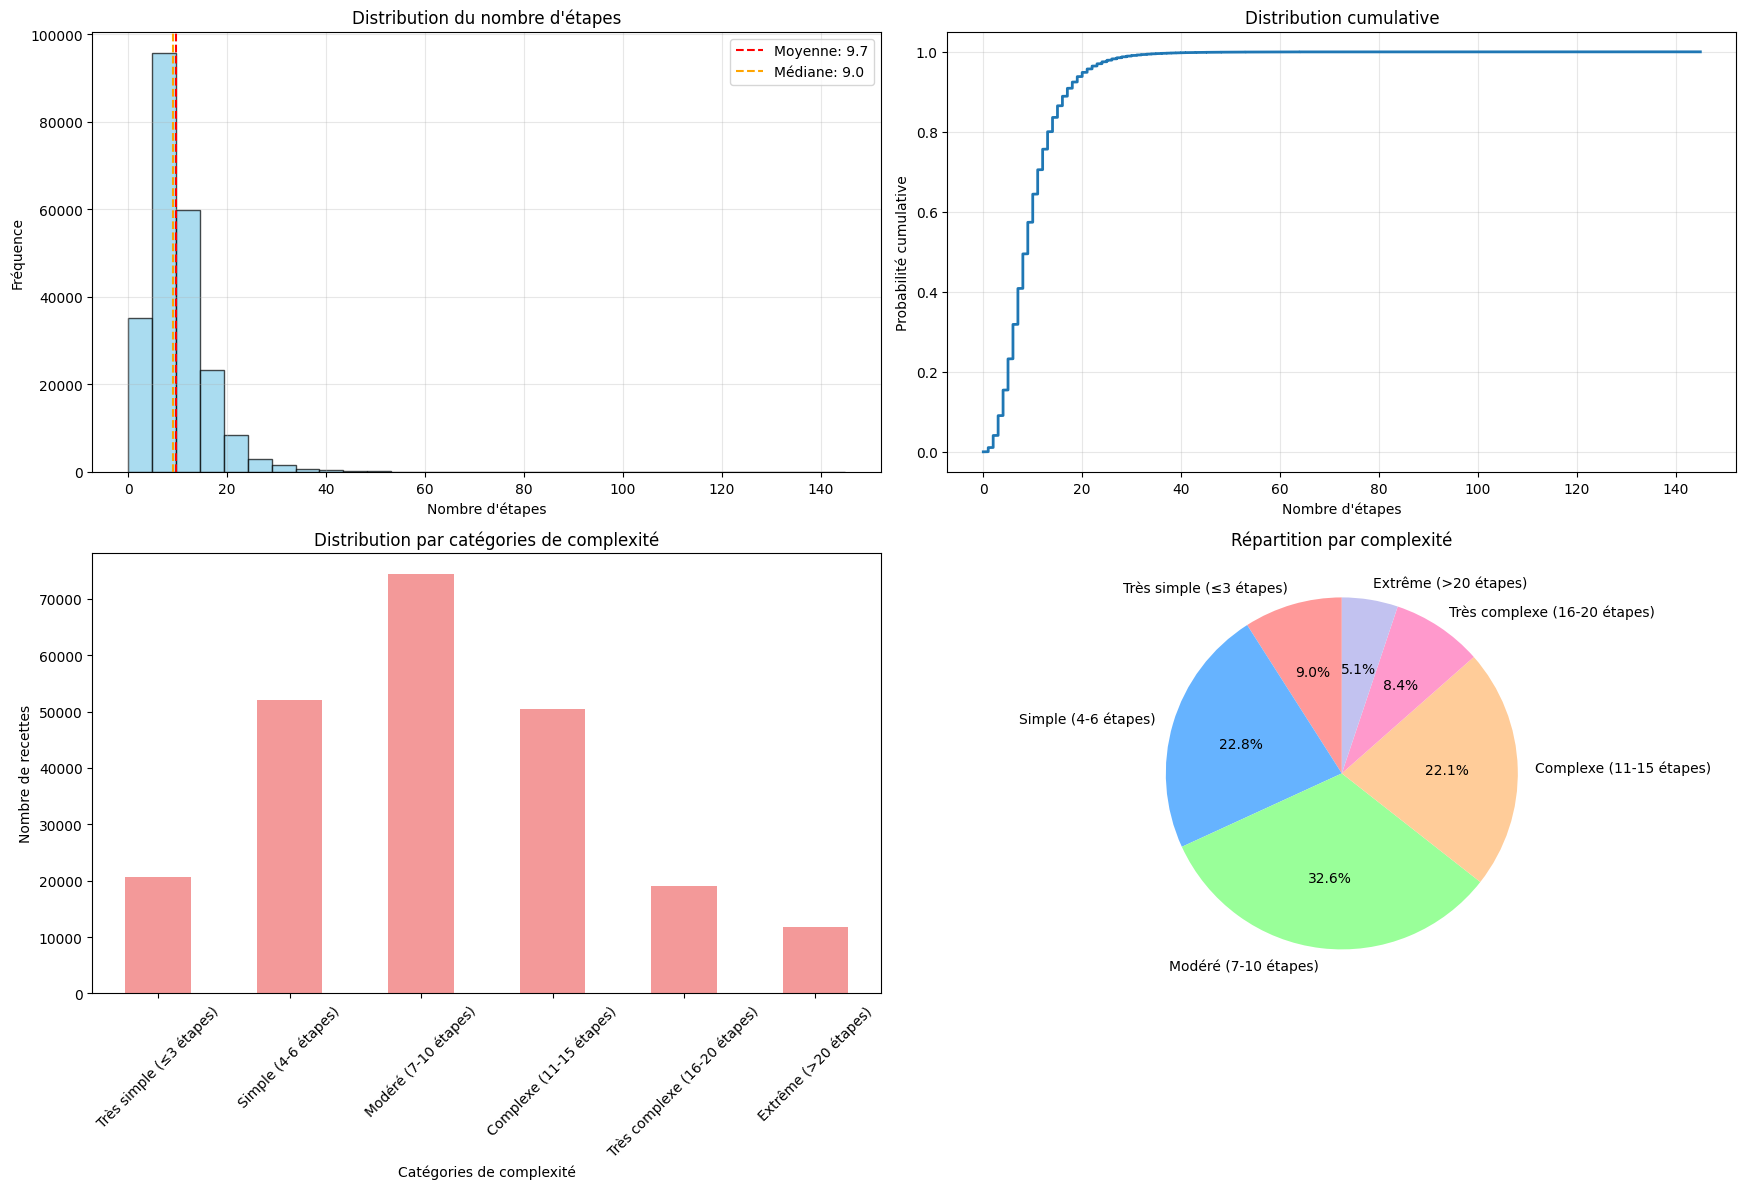

In [52]:
# 3. Visualisations multiples
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Histogramme simple
axes[0,0].hist(df_pp_raw_recipes_cleaned['n_steps'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df_pp_raw_recipes_cleaned['n_steps'].mean(), color='red', linestyle='--', 
                  label=f'Moyenne: {df_pp_raw_recipes_cleaned["n_steps"].mean():.1f}')
axes[0,0].axvline(df_pp_raw_recipes_cleaned['n_steps'].median(), color='orange', linestyle='--', 
                  label=f'Médiane: {df_pp_raw_recipes_cleaned["n_steps"].median():.1f}')
axes[0,0].set_title('Distribution du nombre d\'étapes')
axes[0,0].set_xlabel('Nombre d\'étapes')
axes[0,0].set_ylabel('Fréquence')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Distribution par catégories (graphique en barres)
complexity_order = ["Très simple (≤3 étapes)", "Simple (4-6 étapes)", "Modéré (7-10 étapes)", 
                   "Complexe (11-15 étapes)", "Très complexe (16-20 étapes)", "Extrême (>20 étapes)"]
complexity_ordered = complexity_distribution.reindex(complexity_order, fill_value=0)
complexity_ordered.plot(kind='bar', ax=axes[1,0], color='lightcoral', alpha=0.8)
axes[1,0].set_title('Distribution par catégories de complexité')
axes[1,0].set_xlabel('Catégories de complexité')
axes[1,0].set_ylabel('Nombre de recettes')
axes[1,0].tick_params(axis='x', rotation=45)


# Distribution cumulative
sorted_steps = np.sort(df_pp_raw_recipes_cleaned['n_steps'])
cumulative_prob = np.arange(1, len(sorted_steps) + 1) / len(sorted_steps)
axes[0,1].plot(sorted_steps, cumulative_prob, linewidth=2)
axes[0,1].set_title('Distribution cumulative')
axes[0,1].set_xlabel('Nombre d\'étapes')
axes[0,1].set_ylabel('Probabilité cumulative')
axes[0,1].grid(True, alpha=0.3)


# Diagramme en secteurs pour les catégories
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#c2c2f0']
axes[1,1].pie(complexity_ordered.values, labels=complexity_ordered.index, autopct='%1.1f%%', 
              colors=colors, startangle=90)
axes[1,1].set_title('Répartition par complexité')

plt.tight_layout()
plt.show()

**ETUDE DE LA VARIABLE TAGS**

In [53]:
# tags 
import ast

l_tags = list(df_pp_raw_recipes_cleaned.tags)
list_tags = []
for item in l_tags: 
    item = ast.literal_eval(item)
    for i in item: 
        list_tags.append(i)
        
print('il y a {} tag unique'.format(len(set(list_tags))))

il y a 552 tag unique


In [54]:
from collections import Counter
tags_counts = Counter(list_tags)
top_five_tags = tags_counts.most_common(10)
print(top_five_tags,"\n")

# affichage des tags les moins populaires
rare_tags = [tag for tag, count in tags_counts.items() if count == 1]
print(f"les tags les moins populaires sont : {rare_tags[:10]} ")


[('preparation', 227229), ('time-to-make', 222035), ('course', 214958), ('main-ingredient', 168601), ('dietary', 162667), ('easy', 124513), ('occasion', 112321), ('cuisine', 90067), ('low-in-something', 84548), ('main-dish', 71622)] 

les tags les moins populaires sont : ['eggs-breakfast', 'beef-crock-pot', 'pot-roast', 'irish-st-patricks-day', 'beef-sauces', 'pork-loins-roast', 'baked-beans', 'snacks-kid-friendly', 'snacks-sweet', 'main-dish-pasta'] 


In [55]:
# 3. Analyse de la rareté
print("\n3. ANALYSE DE LA RARETÉ")
frequency_distribution = {}
for tag, count in tags_counts.items():
    if count == 1:
        frequency_distribution['Unique (1)'] = frequency_distribution.get('Unique (1)', 0) + 1
    elif count <= 5:
        frequency_distribution['Très rare (2-5)'] = frequency_distribution.get('Très rare (2-5)', 0) + 1
    elif count <= 20:
        frequency_distribution['Rare (6-20)'] = frequency_distribution.get('Rare (6-20)', 0) + 1
    elif count <= 100:
        frequency_distribution['Peu commun (21-100)'] = frequency_distribution.get('Peu commun (21-100)', 0) + 1
    elif count <= 1000:
        frequency_distribution['Commun (101-1000)'] = frequency_distribution.get('Commun (101-1000)', 0) + 1
    else:
        frequency_distribution['Très commun (>1000)'] = frequency_distribution.get('Très commun (>1000)', 0) + 1

for category, count in frequency_distribution.items():
    percentage = count / len(tags_counts) * 100
    print(f"  {category}: {count} tags ({percentage:.1f}%)")


# 4. Catégorisation thématique des tags

# Définition des catégories
cuisine_tags = ['chinese', 'italian', 'mexican', 'indian', 'french', 'asian', 'greek', 'thai', 'japanese', 'american']
diet_tags = ['vegetarian', 'vegan', 'low-fat', 'low-carb', 'gluten-free', 'dairy-free', 'healthy', 'low-sodium', 'diabetic']
time_tags = ['15-minutes-or-less', '30-minutes-or-less', '60-minutes-or-less', 'quick', 'easy', 'weeknight']
meal_tags = ['breakfast', 'lunch', 'dinner', 'dessert', 'snack', 'appetizer', 'side-dish', 'main-dish']
cooking_method_tags = ['baked', 'grilled', 'fried', 'roasted', 'steamed', 'boiled', 'sauteed', 'broiled']
occasion_tags = ['christmas', 'thanksgiving', 'halloween', 'birthday', 'party', 'holiday', 'summer', 'winter']

def categorize_tag(tag):
    tag_lower = tag.lower()
    if any(cuisine in tag_lower for cuisine in cuisine_tags):
        return 'Cuisine'
    elif any(diet in tag_lower for diet in diet_tags):
        return 'Régime/Santé'
    elif any(time in tag_lower for time in time_tags):
        return 'Temps'
    elif any(meal in tag_lower for meal in meal_tags):
        return 'Type de repas'
    elif any(method in tag_lower for method in cooking_method_tags):
        return 'Méthode de cuisson'
    elif any(occasion in tag_lower for occasion in occasion_tags):
        return 'Occasion'
    else:
        return 'Autre'


3. ANALYSE DE LA RARETÉ
  Très commun (>1000): 256 tags (46.4%)
  Commun (101-1000): 156 tags (28.3%)
  Peu commun (21-100): 60 tags (10.9%)
  Rare (6-20): 24 tags (4.3%)
  Très rare (2-5): 12 tags (2.2%)
  Unique (1): 44 tags (8.0%)


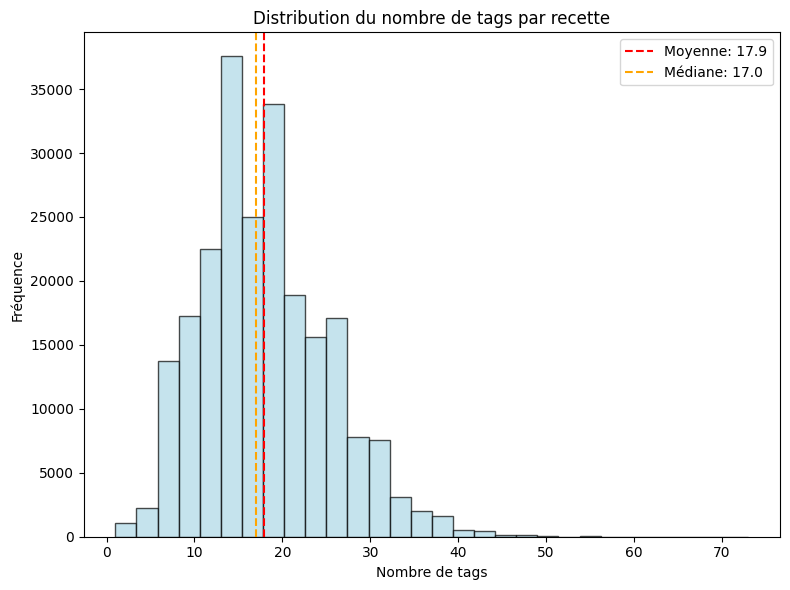

In [56]:
tags_per_recipe = df_pp_raw_recipes_cleaned['tags'].apply(lambda x: len(ast.literal_eval(x)))

# 6. Visualisations
#plot uniquement l'histogramme du nombre de tags par recette
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
# Histogramme du nombre de tags par recette
axes.hist(tags_per_recipe, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes.set_title('Distribution du nombre de tags par recette')
axes.set_xlabel('Nombre de tags')
axes.set_ylabel('Fréquence')
axes.axvline(tags_per_recipe.mean(), color='red', linestyle='--',label=f'Moyenne: {tags_per_recipe.mean():.1f}')
axes.axvline(tags_per_recipe.median(), color='orange', linestyle='--',label=f'Médiane: {tags_per_recipe.median():.1f}')
axes.legend()


plt.tight_layout()
plt.show()

**Etude de la variable submitted**

In [57]:
# top 10 des recettes les plus anciennes
top_10_oldest = df_pp_raw_recipes_cleaned.nsmallest(10, 'submitted')[['id', 'submitted']]
print("Top 10 des recettes les plus anciennes:")
print(top_10_oldest)

# top 10 des recettes les plus récentes
top_10_newest = df_pp_raw_recipes_cleaned.nlargest(10, 'submitted')[['id', 'submitted']]
print("\nTop 10 des recettes les plus récentes:")
print(top_10_newest)

Top 10 des recettes les plus anciennes:
                                             id  submitted
name                                                      
20 000 prize winning chili con carne        190 1999-08-06
barbecued chicken thighs au vin             931 1999-08-06
buttermilk pie in cornmeal pastry           108 1999-08-06
buttermilk pie with gingersnap crumb crust   45 1999-08-06
chinese plum sauce                          203 1999-08-06
chocolatey raisin chip cookies              213 1999-08-06
corn  onion and corn rolls                  583 1999-08-06
grape nuts pie                              563 1999-08-06
greek low fat red pepper feta dip           565 1999-08-06
low fat blueberry grunt                     776 1999-08-06

Top 10 des recettes les plus récentes:
                                                        id  submitted
name                                                                 
mini buffalo chicken cheesesteaks                   537716 2018-12-04
nu


Distribution des recettes par année:
year
1999     1956
2000     1024
2001     4590
2002    19586
2003    17489
2004    16210
2005    23469
2006    26954
2007    33984
2008    30495
2009    22366
2010    11806
2011     7491
2012     5136
2013     3756
2014     1035
2015      303
2016      200
2017      280
2018      180
Name: count, dtype: int64


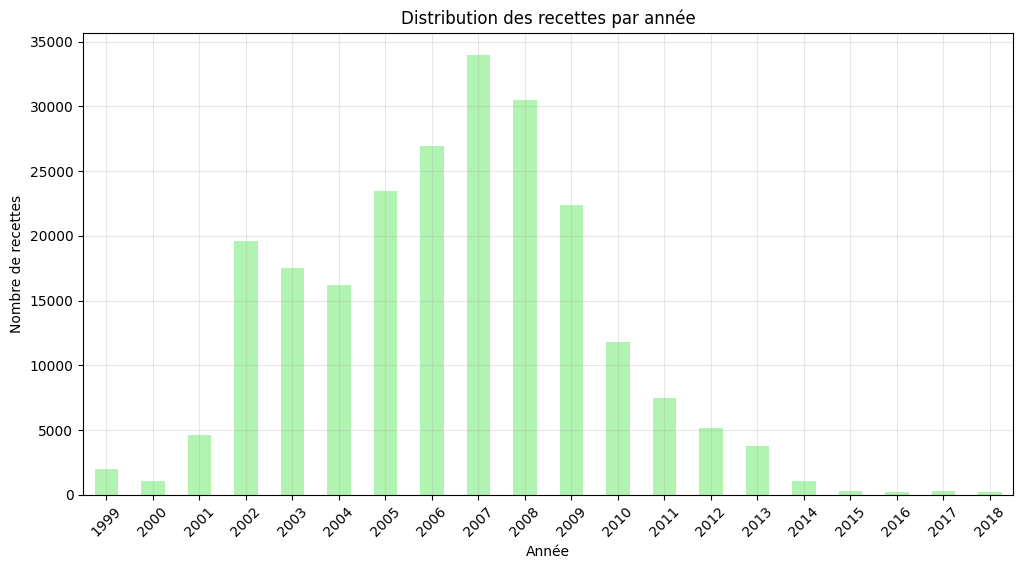

In [58]:
#distribution des recettes par année
df_pp_raw_recipes_cleaned['year'] = df_pp_raw_recipes_cleaned['submitted'].dt.year
yearly_distribution = df_pp_raw_recipes_cleaned['year'].value_counts().sort_index()
print("\nDistribution des recettes par année:")
print(yearly_distribution)
# Visualisation de la distribution des recettes par année
plt.figure(figsize=(12, 6))
yearly_distribution.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Distribution des recettes par année')
plt.xlabel('Année')
plt.ylabel('Nombre de recettes')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

In [59]:
min_date = df_pp_raw_recipes_cleaned['submitted'].min()
max_date = df_pp_raw_recipes_cleaned['submitted'].max()
period_days = (max_date - min_date).days



# Extraction des composantes temporelles
df_pp_raw_recipes_cleaned['month'] = df_pp_raw_recipes_cleaned['submitted'].dt.month
df_pp_raw_recipes_cleaned['day_of_week'] = df_pp_raw_recipes_cleaned['submitted'].dt.dayofweek
df_pp_raw_recipes_cleaned['day_of_year'] = df_pp_raw_recipes_cleaned['submitted'].dt.dayofyear


# Distribution par année
yearly_distribution = df_pp_raw_recipes_cleaned['year'].value_counts().sort_index()


# 4. Analyse de tendance
print("\n4. ANALYSE DE TENDANCE")
# Calcul de la croissance année sur année
yearly_growth = yearly_distribution.pct_change() * 100
print("Croissance annuelle (%):")
for year, growth in yearly_growth.dropna().items():
    print(f"  {year}: {growth:+.1f}%")

# Période de croissance maximale
max_growth_year = yearly_growth.idxmax()
max_growth_value = yearly_growth.max()
print(f"\nCroissance maximale: {max_growth_value:+.1f}% en {max_growth_year}")


4. ANALYSE DE TENDANCE
Croissance annuelle (%):
  2000: -47.6%
  2001: +348.2%
  2002: +326.7%
  2003: -10.7%
  2004: -7.3%
  2005: +44.8%
  2006: +14.8%
  2007: +26.1%
  2008: -10.3%
  2009: -26.7%
  2010: -47.2%
  2011: -36.5%
  2012: -31.4%
  2013: -26.9%
  2014: -72.4%
  2015: -70.7%
  2016: -34.0%
  2017: +40.0%
  2018: -35.7%

Croissance maximale: +348.2% en 2001


In [60]:
# 5. Saisonnalité
print("\n5. ANALYSE DE SAISONNALITÉ")

# Distribution par mois
monthly_distribution = df_pp_raw_recipes_cleaned['month'].value_counts().sort_index()
month_names = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 
               'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']


# Distribution par jour de la semaine
day_names = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
daily_distribution = df_pp_raw_recipes_cleaned['day_of_week'].value_counts().sort_index()
print(f"\nDistribution par jour de la semaine:")
for day, count in daily_distribution.items():
    percentage = count / len(df_pp_raw_recipes_cleaned) * 100
    print(f"  {day_names[day]}: {count} recettes ({percentage:.1f}%)")




5. ANALYSE DE SAISONNALITÉ

Distribution par jour de la semaine:
  Lundi: 47373 recettes (20.7%)
  Mardi: 42177 recettes (18.5%)
  Mercredi: 36976 recettes (16.2%)
  Jeudi: 35300 recettes (15.5%)
  Vendredi: 29206 recettes (12.8%)
  Samedi: 16381 recettes (7.2%)
  Dimanche: 20897 recettes (9.2%)


In [61]:
# 6. Statistiques descriptives temporelles
print("\n6. STATISTIQUES TEMPORELLES")
recipes_per_day = df_pp_raw_recipes_cleaned.groupby(df_pp_raw_recipes_cleaned['submitted'].dt.date).size()
print(f"Moyenne de recettes par jour: {recipes_per_day.mean():.2f}")


6. STATISTIQUES TEMPORELLES
Moyenne de recettes par jour: 44.89


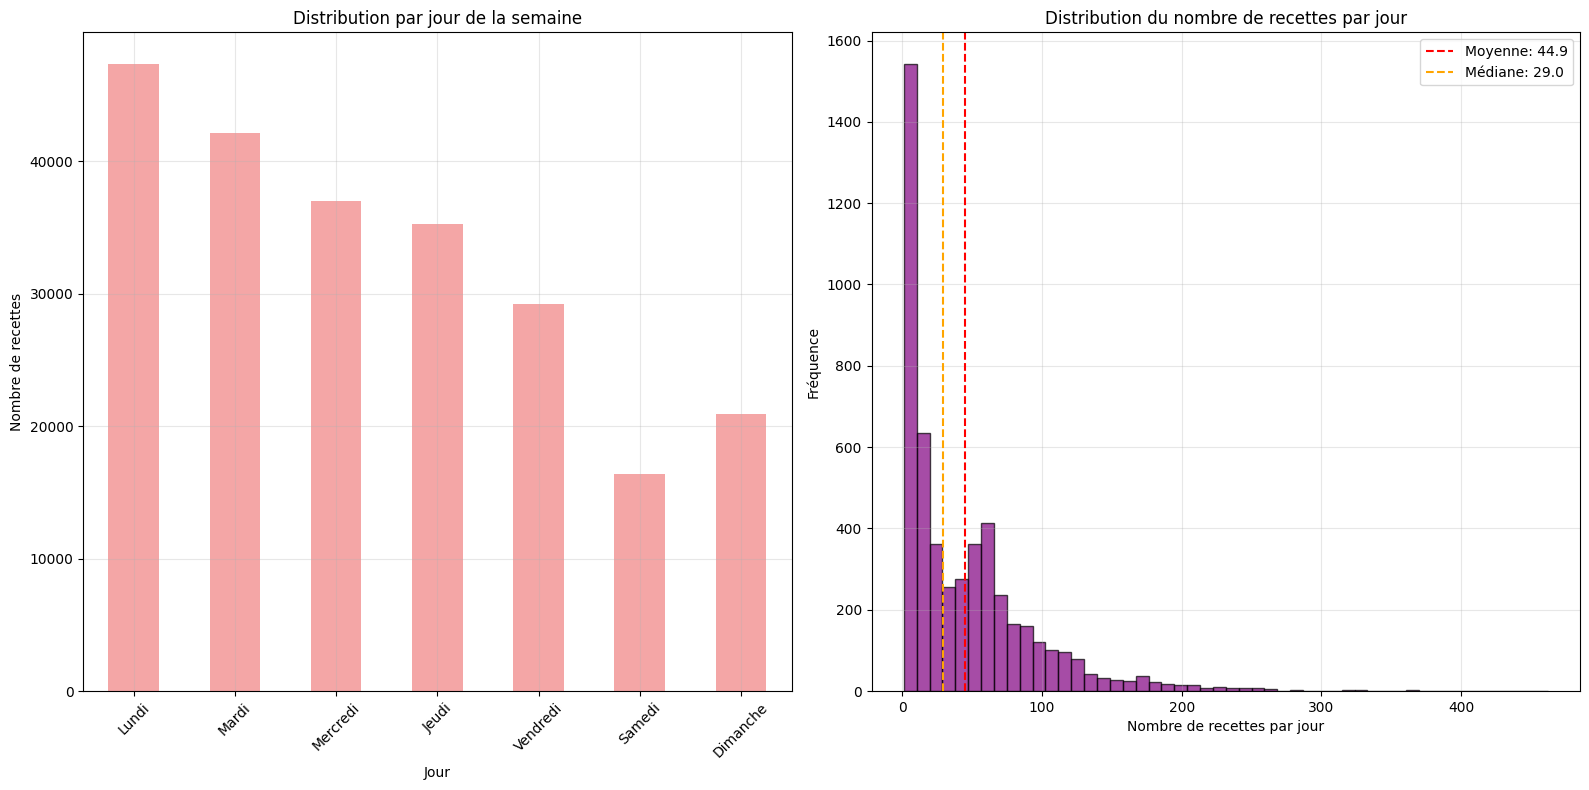


8. TENDANCES À LONG TERME
Première moitié de la période (1999-2007):
  Nombre de recettes: 145262
  Moyenne par jour: 47.32
Seconde moitié de la période (2008-2018):
  Nombre de recettes: 83048
  Moyenne par jour: 20.81

9. INSIGHTS CLÉS
• Période d'activité: 19.3 années (1999-2018)
• Pic d'activité annuel: 33984 recettes en 2007
• Mois le plus actif: Jan (21586 recettes)
• Mois le moins actif: Déc (15791 recettes)
• Jour de la semaine le plus actif: Lundi (47373 recettes)
• Jour de la semaine le moins actif: Samedi (16381 recettes)
• Activité quotidienne moyenne: 44.9 recettes/jour


In [62]:

# 7. Visualisations
fig, axes = plt.subplots(1, 2, figsize=(16, 8))


# Distribution par jour de la semaine
daily_distribution.plot(kind='bar', ax=axes[0], color='lightcoral', alpha=0.7)
axes[0].set_title('Distribution par jour de la semaine')
axes[0].set_xlabel('Jour')
axes[0].set_ylabel('Nombre de recettes')
axes[0].set_xticklabels(day_names, rotation=45)
axes[0].grid(True, alpha=0.3)


# Histogramme des soumissions par jour
axes[1].hist(recipes_per_day, bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1].axvline(recipes_per_day.mean(), color='red', linestyle='--', 
                  label=f'Moyenne: {recipes_per_day.mean():.1f}')
axes[1].axvline(recipes_per_day.median(), color='orange', linestyle='--', 
                  label=f'Médiane: {recipes_per_day.median():.1f}')
axes[1].set_title('Distribution du nombre de recettes par jour')
axes[1].set_xlabel('Nombre de recettes par jour')
axes[1].set_ylabel('Fréquence')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Analyse des tendances à long terme
print("\n8. TENDANCES À LONG TERME")
early_period = df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned['year'] <= df_pp_raw_recipes_cleaned['year'].median()]
late_period = df_pp_raw_recipes_cleaned[df_pp_raw_recipes_cleaned['year'] > df_pp_raw_recipes_cleaned['year'].median()]

print(f"Première moitié de la période ({early_period['year'].min()}-{int(df_pp_raw_recipes_cleaned['year'].median())}):")
print(f"  Nombre de recettes: {len(early_period)}")
print(f"  Moyenne par jour: {len(early_period)/((early_period['submitted'].max() - early_period['submitted'].min()).days + 1):.2f}")

print(f"Seconde moitié de la période ({int(df_pp_raw_recipes_cleaned['year'].median())+1}-{late_period['year'].max()}):")
print(f"  Nombre de recettes: {len(late_period)}")
print(f"  Moyenne par jour: {len(late_period)/((late_period['submitted'].max() - late_period['submitted'].min()).days + 1):.2f}")

# 9. Insights et synthèse
print("\n9. INSIGHTS CLÉS")
peak_month = monthly_distribution.idxmax()
low_month = monthly_distribution.idxmin()
peak_day = daily_distribution.idxmax()
low_day = daily_distribution.idxmin()

print(f"• Période d'activité: {period_days/365.25:.1f} années ({min_date.year}-{max_date.year})")
print(f"• Pic d'activité annuel: {yearly_distribution.max()} recettes en {yearly_distribution.idxmax()}")
print(f"• Mois le plus actif: {month_names[peak_month-1]} ({monthly_distribution[peak_month]} recettes)")
print(f"• Mois le moins actif: {month_names[low_month-1]} ({monthly_distribution[low_month]} recettes)")
print(f"• Jour de la semaine le plus actif: {day_names[peak_day]} ({daily_distribution[peak_day]} recettes)")
print(f"• Jour de la semaine le moins actif: {day_names[low_day]} ({daily_distribution[low_day]} recettes)")
print(f"• Activité quotidienne moyenne: {recipes_per_day.mean():.1f} recettes/jour")

In [63]:
df_pp_raw_recipes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228310 entries, arriba   baked winter squash mexican style to cookies by design   sugar shortbread cookies
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              228310 non-null  int64         
 1   minutes         228310 non-null  int64         
 2   contributor_id  228310 non-null  int64         
 3   submitted       228310 non-null  datetime64[ns]
 4   tags            228310 non-null  object        
 5   nutrition       228310 non-null  object        
 6   n_steps         228310 non-null  int64         
 7   steps           228310 non-null  object        
 8   description     228310 non-null  object        
 9   ingredients     228310 non-null  object        
 10  n_ingredients   228310 non-null  int64         
 11  calories        228310 non-null  float64       
 12  total fat       228310 non-null  float64       
 13  sugar          

**Etude univariée de la variable nutrition**


In [64]:
#récupérer la valeur max et min dans la colonne calories
print("max calories:", df_pp_raw_recipes_cleaned["calories"].max())
print("min calories:", df_pp_raw_recipes_cleaned["calories"].min()) 

max calories: 4987.0
min calories: 0.0


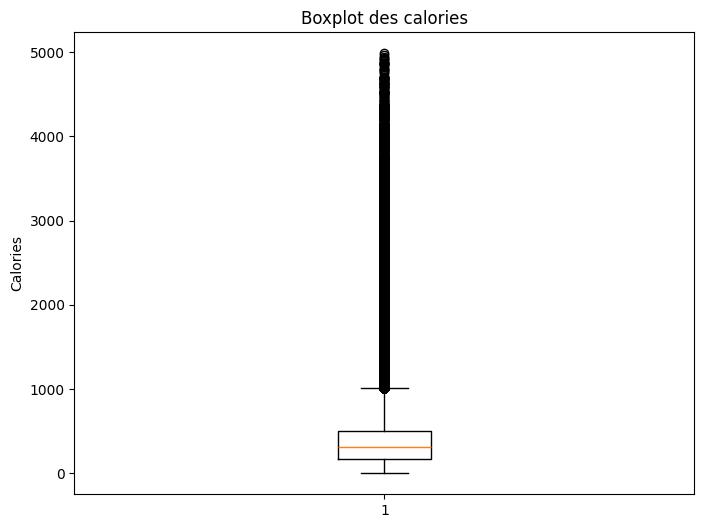

In [65]:
#boxplot calories
plt.figure(figsize=(8, 6))
plt.boxplot(df_pp_raw_recipes_cleaned['calories'])
plt.title("Boxplot des calories")
plt.ylabel("Calories")  
plt.show()

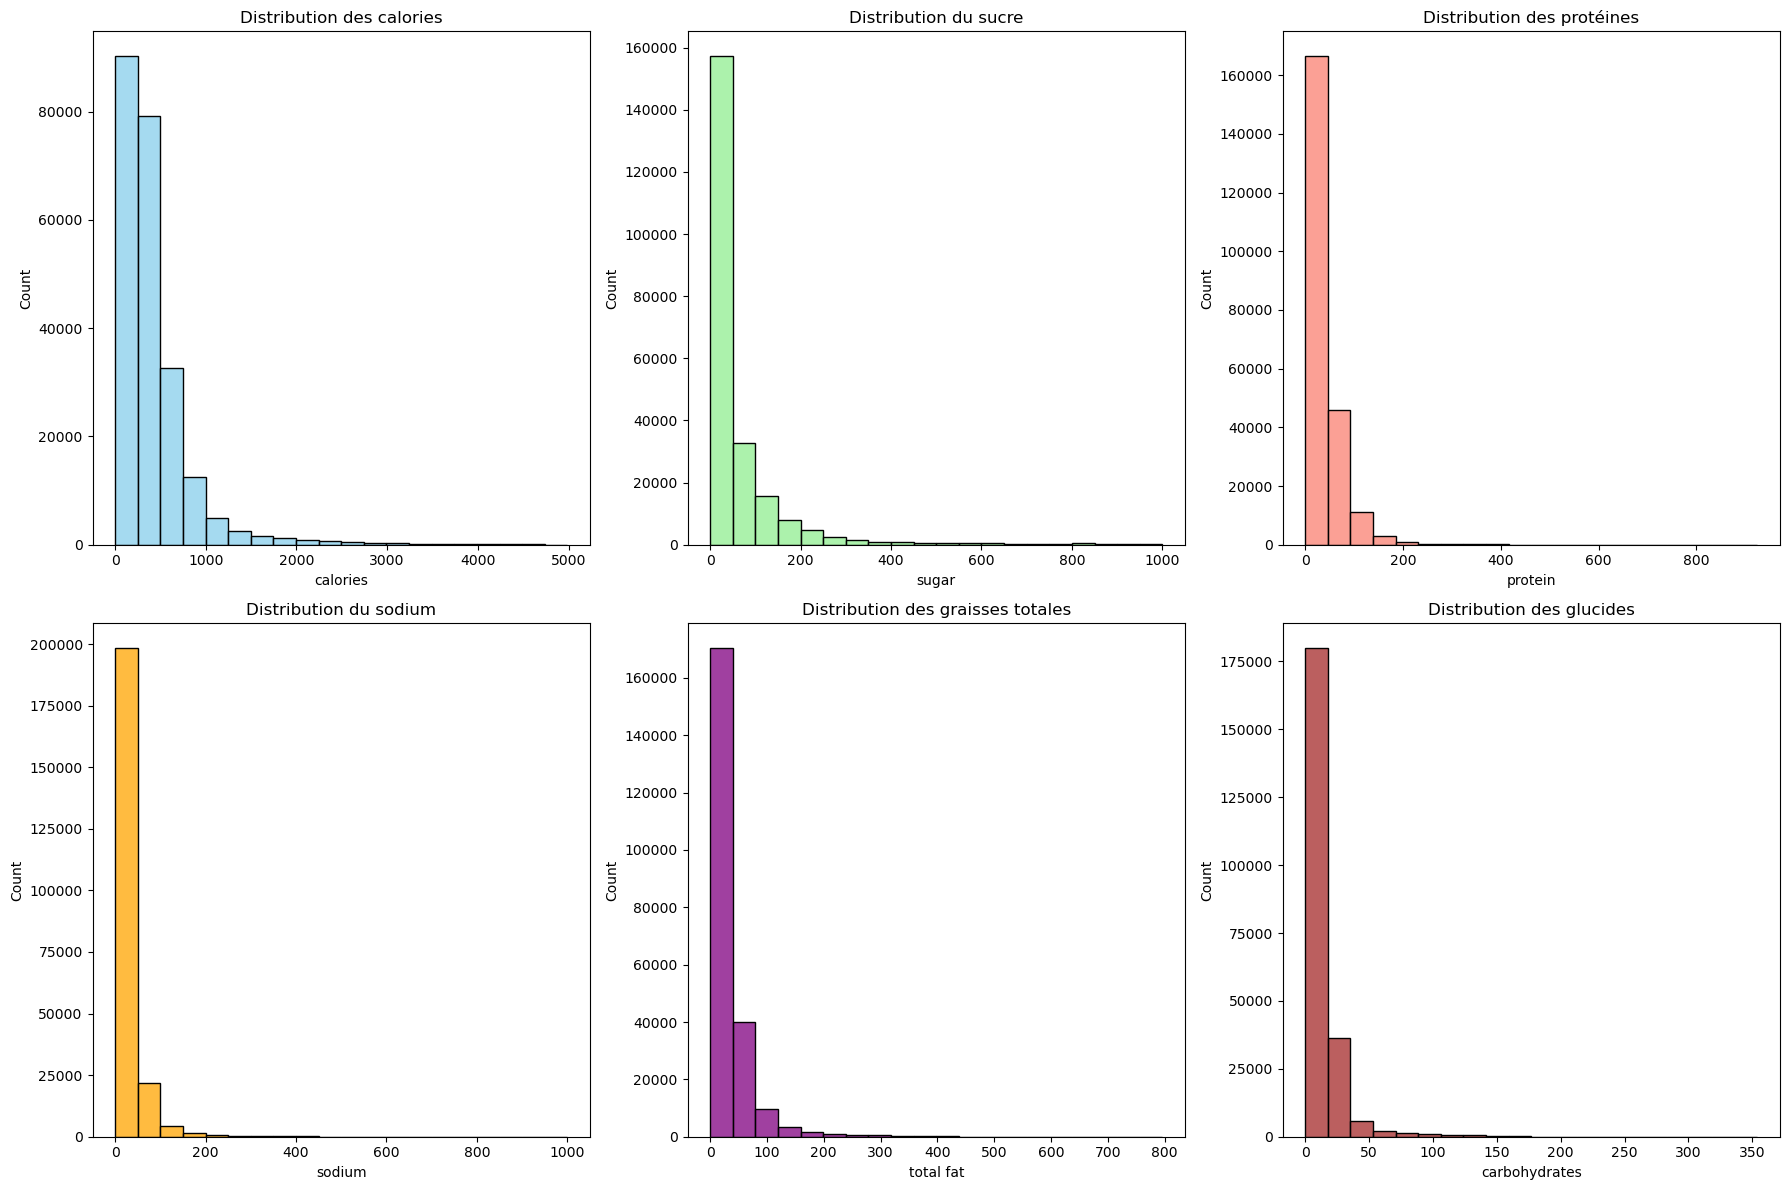

In [74]:
### affichons la distribution des calories, du sucre et des protéines, saturated fat, total fat, carbohydrates et sodium
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.histplot(df_pp_raw_recipes_cleaned['calories'], bins=20, kde=False, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distribution des calories')
sns.histplot(df_pp_raw_recipes_cleaned['sugar'], bins=20, kde=False, ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Distribution du sucre')
sns.histplot(df_pp_raw_recipes_cleaned['protein'], bins=20, kde=False, ax=axes[0,2], color='salmon')
axes[0,2].set_title('Distribution des protéines')
sns.histplot(df_pp_raw_recipes_cleaned['sodium'], bins=20, kde=False, ax=axes[1,0], color='orange')
axes[1,0].set_title('Distribution du sodium')
sns.histplot(df_pp_raw_recipes_cleaned['total fat'], bins=20, kde=False, ax=axes[1,1], color='purple')
axes[1,1].set_title('Distribution des graisses totales')
sns.histplot(df_pp_raw_recipes_cleaned['carbohydrates'], bins=20, kde=False, ax=axes[1,2], color='brown')
axes[1,2].set_title('Distribution des glucides')
plt.tight_layout()
plt.show()

In [70]:
##saugarde du dataframe nettoyé
df_pp_raw_recipes_cleaned.to_csv("../pp_raw_recipes_cleaned.csv", index=False)

In [75]:
# Charger les fichiers
interactions_df = pd.read_csv("../processed_recipe.csv")
recipes_df = pd.read_csv("../pp_raw_recipes_cleaned.csv")

In [78]:
interactions_df.head(5)

,recipe_id,total_reviews,negative_reviews,negative_score
0,38,4,0,0.000000
1,39,1,1,0.693147
2,40,9,1,2.302585
3,41,2,0,0.000000
4,43,1,1,0.693147


In [80]:
interactions_df.shape

(231637, 4)

In [81]:
recipes_df.shape

(228310, 22)

In [79]:
recipes_df.head(5)

,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,...,total fat,sugar,sodium,protein,saturated fat,carbohydrates,year,month,day_of_week,day_of_year
0,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,0.0,13.0,0.0,2.0,0.0,4.0,2005,9,4,259
1,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",...,18.0,0.0,17.0,22.0,35.0,1.0,2002,6,0,168
2,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",...,22.0,32.0,48.0,39.0,27.0,5.0,2005,2,4,56
3,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",...,17.0,10.0,2.0,14.0,8.0,20.0,2003,4,0,104
4,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,1.0,337.0,23.0,3.0,0.0,28.0,2002,10,4,298


In [ ]:
# 1) Harmoniser les noms de colonnes
recipes_df = recipes_df.rename(columns={'id': 'recipe_id'})
merged_df = interactions_df.merge(recipes_df, on='recipe_id', how='left')
print("Shape of merged dataframe:", merged_df.shape)   

Shape of merged dataframe: (231637, 25)


In [91]:
merged_df.sample(5)

,recipe_id,total_reviews,negative_reviews,negative_score,minutes,contributor_id,submitted,tags,nutrition,n_steps,...,total fat,sugar,sodium,protein,saturated fat,carbohydrates,year,month,day_of_week,day_of_year
48815,85153,16,2,5.666427,65.0,2.037500e+04,2004-02-26,"['time-to-make', 'course', 'main-ingredient', ...","[206.9, 21.0, 4.0, 14.0, 30.0, 25.0, 1.0]",7.0,...,21.0,4.0,14.0,30.0,25.0,1.0,2004.0,2.0,3.0,57.0
231253,531001,1,0,0.000000,45.0,2.001464e+09,2017-04-03,"['60-minutes-or-less', 'time-to-make', 'course...","[156.0, 2.0, 9.0, 43.0, 13.0, 0.0, 10.0]",6.0,...,2.0,9.0,43.0,13.0,0.0,10.0,2017.0,4.0,0.0,93.0
198598,397906,1,0,0.000000,55.0,4.400730e+05,2009-11-05,"['weeknight', '60-minutes-or-less', 'time-to-m...","[231.5, 25.0, 2.0, 6.0, 23.0, 50.0, 3.0]",7.0,...,25.0,2.0,6.0,23.0,50.0,3.0,2009.0,11.0,3.0,309.0
157051,294632,3,0,0.000000,50.0,3.865850e+05,2008-03-26,"['60-minutes-or-less', 'time-to-make', 'course...","[756.5, 60.0, 24.0, 30.0, 103.0, 77.0, 16.0]",11.0,...,60.0,24.0,30.0,103.0,77.0,16.0,2008.0,3.0,2.0,86.0
134922,246600,1,0,0.000000,30.0,2.071760e+05,2007-08-14,"['30-minutes-or-less', 'time-to-make', 'course...","[245.3, 17.0, 7.0, 39.0, 60.0, 13.0, 1.0]",11.0,...,17.0,7.0,39.0,60.0,13.0,1.0,2007.0,8.0,1.0,226.0


In [93]:
###Apercu des données fusionnées
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   recipe_id         231637 non-null  int64  
 1   total_reviews     231637 non-null  int64  
 2   negative_reviews  231637 non-null  int64  
 3   negative_score    231637 non-null  float64
 4   minutes           228310 non-null  float64
 5   contributor_id    228310 non-null  float64
 6   submitted         228310 non-null  object 
 7   tags              228310 non-null  object 
 8   nutrition         228310 non-null  object 
 9   n_steps           228310 non-null  float64
 10  steps             228310 non-null  object 
 11  description       228310 non-null  object 
 12  ingredients       228310 non-null  object 
 13  n_ingredients     228310 non-null  float64
 14  calories          228310 non-null  float64
 15  total fat         228310 non-null  float64
 16  sugar             22

In [96]:
merged_df.dtypes

recipe_id             int64
total_reviews         int64
negative_reviews      int64
negative_score      float64
minutes             float64
contributor_id      float64
submitted            object
tags                 object
nutrition            object
n_steps             float64
steps                object
description          object
ingredients          object
n_ingredients       float64
calories            float64
total fat           float64
sugar               float64
sodium              float64
protein             float64
saturated fat       float64
carbohydrates       float64
year                float64
month               float64
day_of_week         float64
day_of_year         float64
dtype: object

In [92]:
##sauvegarde du dataframe fusionné
merged_df.to_csv("../merged_recipes_interactions.csv", index=False)

In [97]:
merged_df['minutes'].describe()

count    2.283100e+05
mean     1.194346e+02
std      2.841402e+03
min      0.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      6.500000e+01
max      1.051200e+06
Name: minutes, dtype: float64

In [100]:
##affichons d'abord les lignes dont la colonne minutes est infrieur a 1
merged_df[merged_df['minutes'] < 1]


,recipe_id,total_reviews,negative_reviews,negative_score,minutes,contributor_id,submitted,tags,nutrition,n_steps,...,total fat,sugar,sodium,protein,saturated fat,carbohydrates,year,month,day_of_week,day_of_year
193,387,2,0,0.000000,0.0,1737.0,1999-08-30,"['15-minutes-or-less', 'time-to-make', 'course...","[91.0, 1.0, 72.0, 6.0, 2.0, 3.0, 6.0]",5.0,...,1.0,72.0,6.0,2.0,3.0,6.0,1999.0,8.0,0.0,242.0
367,707,1,0,0.000000,0.0,39547.0,1999-08-08,"['15-minutes-or-less', 'time-to-make', 'course...","[508.2, 41.0, 17.0, 15.0, 42.0, 80.0, 15.0]",15.0,...,41.0,17.0,15.0,42.0,80.0,15.0,1999.0,8.0,6.0,220.0
371,736,9,1,2.302585,0.0,1530.0,1999-09-07,"['15-minutes-or-less', 'time-to-make', 'course...","[61.5, 3.0, 8.0, 6.0, 6.0, 2.0, 2.0]",9.0,...,3.0,8.0,6.0,6.0,2.0,2.0,1999.0,9.0,1.0,250.0
372,742,3,0,0.000000,0.0,1530.0,1999-08-18,"['15-minutes-or-less', 'time-to-make', 'course...","[138.2, 2.0, 0.0, 6.0, 8.0, 1.0, 8.0]",25.0,...,2.0,0.0,6.0,8.0,1.0,8.0,1999.0,8.0,2.0,230.0
377,760,3,0,0.000000,0.0,124030.0,1999-08-15,"['15-minutes-or-less', 'time-to-make', 'course...","[1933.3, 163.0, 86.0, 141.0, 391.0, 207.0, 13.0]",5.0,...,163.0,86.0,141.0,391.0,207.0,13.0,1999.0,8.0,6.0,227.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43992,76699,1,0,0.000000,0.0,111843.0,2003-11-16,"['15-minutes-or-less', 'time-to-make', 'course...","[343.7, 18.0, 100.0, 24.0, 7.0, 33.0, 19.0]",9.0,...,18.0,100.0,24.0,7.0,33.0,19.0,2003.0,11.0,6.0,320.0
44939,78355,1,1,0.693147,0.0,111843.0,2003-12-09,"['15-minutes-or-less', 'time-to-make', 'course...","[1188.6, 27.0, 70.0, 100.0, 69.0, 26.0, 73.0]",1.0,...,27.0,70.0,100.0,69.0,26.0,73.0,2003.0,12.0,1.0,343.0
45924,80121,7,1,2.079442,0.0,51881.0,2004-01-05,"['15-minutes-or-less', 'time-to-make', 'course...","[752.9, 50.0, 399.0, 15.0, 20.0, 86.0, 37.0]",13.0,...,50.0,399.0,15.0,20.0,86.0,37.0,2004.0,1.0,0.0,5.0
47694,83257,16,0,0.000000,0.0,114027.0,2004-02-06,"['15-minutes-or-less', 'time-to-make', 'course...","[187.2, 8.0, 14.0, 28.0, 16.0, 4.0, 9.0]",2.0,...,8.0,14.0,28.0,16.0,4.0,9.0,2004.0,2.0,4.0,37.0


In [ ]:
one_month = 60 * 24 * 30  # 43 200 minutes = 30 jours

extreme_recipes = merged_df[merged_df['minutes'] > one_month]
print("Nombre de recettes extrêmes :", len(extreme_recipes))



Nombre de recettes extrêmes : 55


,recipe_id,minutes,tags,description
742,2714,167040.0,"['weeknight', 'time-to-make', 'course', 'main-...",No_description
1132,3476,49050.0,"['time-to-make', 'course', 'main-ingredient', ...",No_description
5799,13345,144015.0,"['weeknight', 'time-to-make', 'course', 'main-...","my mother makes this all the time, she used to..."
10985,21584,47520.0,"['weeknight', 'time-to-make', 'course', 'main-...",this is armenian cured spiced beef. it is a wo...
16611,30845,44645.0,"['weeknight', 'time-to-make', 'course', 'main-...","mixed with good olive oil, this makes a fabulo..."
17796,32727,50400.0,"['weeknight', 'time-to-make', 'course', 'main-...","this pickle is made the traditional way, with ..."
23051,41402,86400.0,"['weeknight', 'time-to-make', 'course', 'main-...",sweet liqueurs made with seasonal fruit -- get...
23052,41403,86400.0,"['weeknight', 'time-to-make', 'course', 'main-...",sweet and lethal. a great way to give gifts ov...
23053,41404,86400.0,"['weeknight', 'time-to-make', 'course', 'main-...",a great way to bring the summer fruits into th...
23560,42247,69120.0,"['weeknight', 'time-to-make', 'main-ingredient...",for the purist in you... the purest vanilla fl...


In [107]:
# Aperçu
extreme_recipes[['recipe_id', 'minutes', 'tags', 'description']].sample(5)

,recipe_id,minutes,tags,description
130272,236340,146880.0,"['time-to-make', 'cuisine', 'preparation', '5-...",in 1985 (the year my daughter rachel was born)...
23560,42247,69120.0,"['weeknight', 'time-to-make', 'main-ingredient...",for the purist in you... the purest vanilla fl...
188697,372282,72000.0,"['time-to-make', 'course', 'preparation', 'for...","this quick no fuss cake travel very well, so i..."
59244,102098,43380.0,"['time-to-make', 'course', 'preparation', 'for...",a recipe from my friend roy heflin. note that ...
55504,96002,60510.0,"['time-to-make', 'course', 'main-ingredient', ...",posted in response to a request for dill pickl...


In [110]:
def categorize_time(m):
    if m == 0:
        return "Durée manquante / invalide"
    elif m <= 15:
        return "Très rapide"
    elif m <= 30:
        return "Rapide"
    elif m <= 60:
        return "Moyenne"
    elif m <= 180:
        return "Longue"
    elif m <= 1440:
        return "Très longue (≤ 1 jour)"
    elif m <= 43200:
        return "Exceptionnelle (≤ 1 mois)"
    else:
        return "Extrême (> 1 mois)"

merged_df["time_category"] = merged_df["minutes"].apply(categorize_time)


In [112]:
merged_df.drop(columns='time_category', inplace=True) 

Le temps de préparation influence-t-il le niveau de satisfaction des utilisateurs ?

C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_10552\3066713766.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_10552\3066713766.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


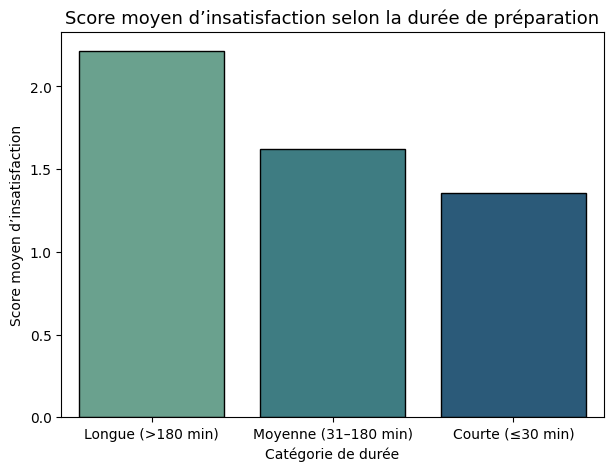

In [115]:
# Fonction de regroupement simple
def regroup_time(m):
    if m == 0:
        return "Invalide"
    elif m <= 30:
        return "Courte (≤30 min)"
    elif m <= 180:
        return "Moyenne (31–180 min)"
    else:
        return "Longue (>180 min)"

merged_df["time_group"] = merged_df["minutes"].apply(regroup_time)

# Filtrer les valides
df = merged_df[merged_df["time_group"] != "Invalide"]

plt.figure(figsize=(7,5))
sns.barplot(
    data=df,
    x="time_group",
    y="negative_score",
    palette="crest",
    ci=None,  # ou "95" pour intervalle de confiance
    edgecolor="black"
)
plt.title("Score moyen d’insatisfaction selon la durée de préparation", fontsize=13)
plt.xlabel("Catégorie de durée")
plt.ylabel("Score moyen d’insatisfaction")
plt.show()

In [116]:
# Vérification de la corrélation
corr = df["minutes"].corr(df["negative_score"], method="spearman")
print(f"Corrélation de Spearman entre minutes et score d’insatisfaction : {corr:.3f}")


Corrélation de Spearman entre minutes et score d’insatisfaction : 0.044


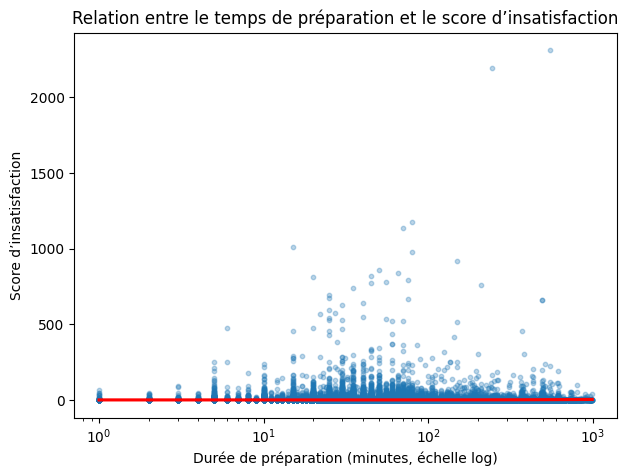

In [117]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df[df["minutes"] < 1000],  # on exclut les durées extrêmes
    x="minutes",
    y="negative_score",
    scatter_kws={"alpha": 0.3, "s": 10},
    line_kws={"color": "red"},
)
plt.xscale("log")
plt.title("Relation entre le temps de préparation et le score d’insatisfaction")
plt.xlabel("Durée de préparation (minutes, échelle log)")
plt.ylabel("Score d’insatisfaction")
plt.show()


In [118]:
df["n_ingredients"].describe()


count    227284.000000
mean          9.053022
std           3.733580
min           1.000000
25%           6.000000
50%           9.000000
75%          11.000000
max          43.000000
Name: n_ingredients, dtype: float64

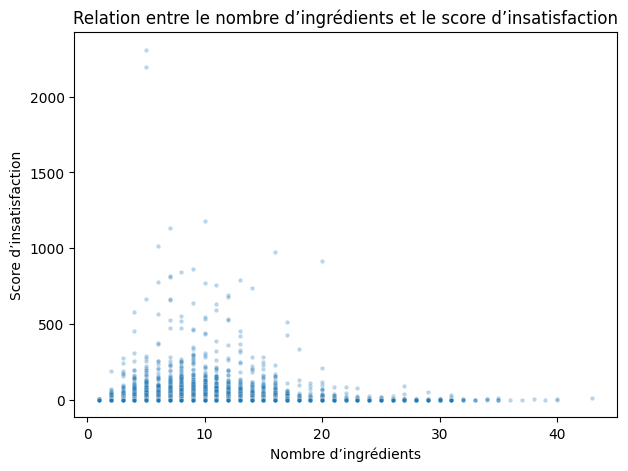

In [120]:
###visualison de la distribution du nombre d'ingrédients par recette en fonction du score d'insatisfaction
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=merged_df,
    x="n_ingredients",
    y="negative_score",
    alpha=0.3,
    s=10
)
plt.title("Relation entre le nombre d’ingrédients et le score d’insatisfaction")
plt.xlabel("Nombre d’ingrédients")
plt.ylabel("Score d’insatisfaction")
plt.show()

In [121]:
df_filtered = df[df["n_ingredients"] <= 30]

def categorize_ingredients(n):
    if n <= 5:
        return "Simple (≤5)"
    elif n <= 10:
        return "Moyenne (6–10)"
    else:
        return "Complexe (>10)"

df_filtered["ingredient_category"] = df_filtered["n_ingredients"].apply(categorize_ingredients)


C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_10552\1001382258.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["ingredient_category"] = df_filtered["n_ingredients"].apply(categorize_ingredients)


C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_10552\3984781785.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_10552\3984781785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


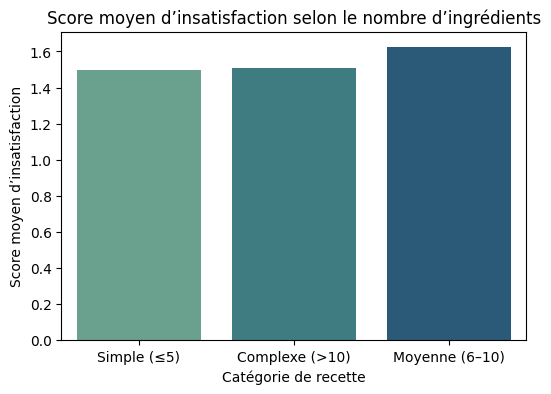

In [122]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=df_filtered,
    x="ingredient_category",
    y="negative_score",
    palette="crest",
    ci=None
)
plt.title("Score moyen d’insatisfaction selon le nombre d’ingrédients")
plt.xlabel("Catégorie de recette")
plt.ylabel("Score moyen d’insatisfaction")
plt.show()


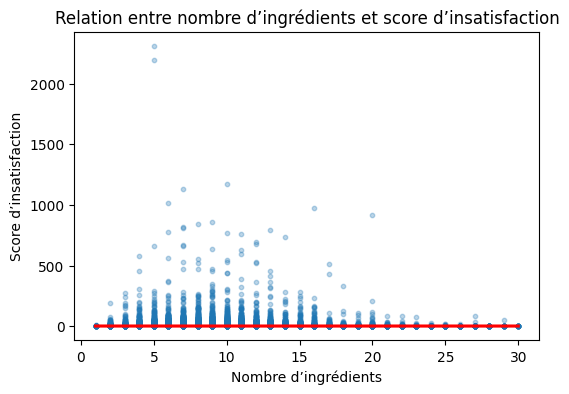

Corrélation de Spearman : 0.009


In [123]:
plt.figure(figsize=(6,4))
sns.regplot(
    data=df_filtered,
    x="n_ingredients",
    y="negative_score",
    scatter_kws={"alpha": 0.3, "s": 10},
    line_kws={"color": "red"}
)
plt.title("Relation entre nombre d’ingrédients et score d’insatisfaction")
plt.xlabel("Nombre d’ingrédients")
plt.ylabel("Score d’insatisfaction")
plt.show()

corr = df_filtered["n_ingredients"].corr(df_filtered["negative_score"], method="spearman")
print(f"Corrélation de Spearman : {corr:.3f}")


Les analyses menées sur la durée de préparation et le nombre d’ingrédients montrent qu’il n’existe pas de relation significative entre ces variables et le score d’insatisfaction des utilisateurs.
Autrement dit, une recette longue ou complexe n’est pas forcément plus critiquée qu’une recette simple ou rapide.

Ces résultats suggèrent que les facteurs techniques — tels que le temps nécessaire ou la complexité de la recette — ne sont pas les principaux déterminants de la satisfaction.
Les utilisateurs semblent plutôt juger les recettes selon des critères qualitatifs (goût, type de plat, attentes personnelles, ou présentation) plutôt que sur la durée ou la difficulté.

Ainsi, le niveau d’insatisfaction ne dépend pas directement de l’effort ou du temps investi, mais davantage de l’expérience gustative perçue ou de la catégorie culinaire.

En conclusion, il devient pertinent de poursuivre l’étude en se concentrant sur le type de recette (tags) afin d’identifier quelles catégories de plats (desserts, plats principaux, boissons, etc.) sont les plus sujettes aux critiques.

In [125]:
from collections import Counter
import ast

# Conversion sécurisée des chaînes en listes
def safe_eval(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    return []

df["tags"] = df["tags"].apply(safe_eval)

# Compter les tags les plus fréquents (en ignorant les NaN et erreurs)
tag_counts = Counter(
    tag
    for tags in df["tags"]
    if isinstance(tags, list)
    for tag in tags
)

top_tags = [t for t, _ in tag_counts.most_common(15)]
print("Top 15 tags :", top_tags)

C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_10552\991005683.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tags"] = df["tags"].apply(safe_eval)


Top 15 tags : ['preparation', 'time-to-make', 'course', 'main-ingredient', 'dietary', 'easy', 'occasion', 'cuisine', 'low-in-something', 'main-dish', '60-minutes-or-less', 'equipment', 'number-of-servings', 'meat', '30-minutes-or-less']


In [126]:
tag_sentiment = []

# On calcule le score moyen et le nombre de recettes par tag
for tag in top_tags:
    subset = df[df["tags"].apply(lambda tags: isinstance(tags, list) and tag in tags)]
    mean_score = subset["negative_score"].mean()
    count = len(subset)
    tag_sentiment.append((tag, mean_score, count))

# Création d'un DataFrame propre
tag_df = pd.DataFrame(tag_sentiment, columns=["tag", "mean_negative_score", "count"])
tag_df = tag_df.sort_values("mean_negative_score", ascending=False)
tag_df.head(10)


,tag,mean_negative_score,count
11,equipment,2.773548,68876
13,meat,2.174953,55638
12,number-of-servings,2.035447,56835
9,main-dish,2.022484,71439
4,dietary,1.869550,161664
6,occasion,1.842616,111728
7,cuisine,1.708509,89644
8,low-in-something,1.665267,84117
3,main-ingredient,1.655689,167865
10,60-minutes-or-less,1.624783,69116


C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_10552\805980884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


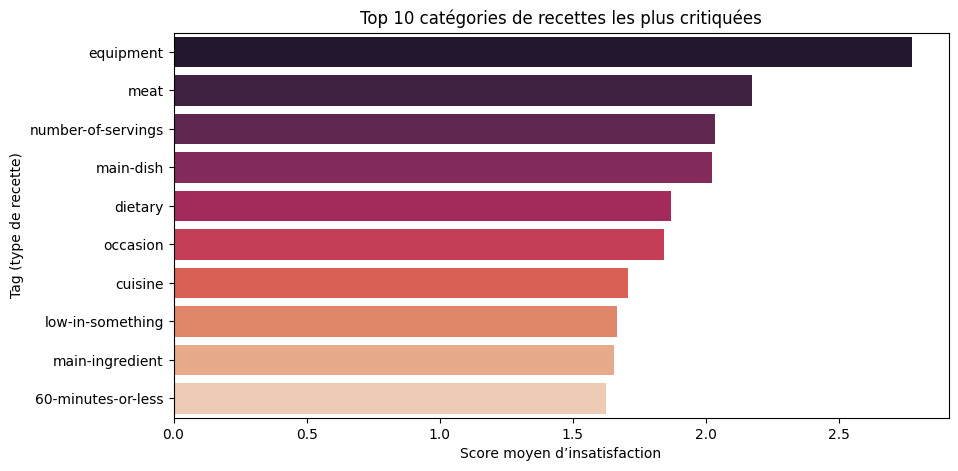

In [127]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=tag_df.head(10),
    x="mean_negative_score",
    y="tag",
    palette="rocket"
)
plt.title("Top 10 catégories de recettes les plus critiquées")
plt.xlabel("Score moyen d’insatisfaction")
plt.ylabel("Tag (type de recette)")
plt.show()


Le graphique montre les 10 catégories de recettes (tags) présentant les scores moyens d’insatisfaction les plus élevés.

Les tags comme “equipment”, “meat”, “number-of-servings” ou “main-dish” apparaissent en tête, indiquant que les recettes associées à ces catégories sont plus souvent critiquées par les utilisateurs.

Ces résultats peuvent s’expliquer par plusieurs facteurs :

Les recettes “equipment” ou “meat” nécessitent souvent du matériel spécifique ou une maîtrise technique (cuissons précises, températures, ustensiles adaptés), ce qui augmente le risque d’échec.

Les plats “main-dish” ou “occasion” sont généralement préparés pour des repas importants, donc les attentes des utilisateurs sont plus fortes.

Les catégories “dietary” ou “low-in-something” peuvent frustrer certains utilisateurs en raison de compromis sur le goût.

À l’inverse, des tags plus généraux ou rapides comme “60-minutes-or-less” obtiennent des scores d’insatisfaction plus faibles, ce qui reflète des recettes plus simples et accessibles.

Conclusion générale

Cette analyse confirme que le type de recette (capturé par les tags) joue un rôle déterminant dans la perception des utilisateurs.
Les critiques ne concernent pas tant la durée ou la complexité, mais plutôt le contexte culinaire et les attentes liées à chaque catégorie.

In [128]:
# Calcul fréquence + score moyen
tag_df["popularity"] = tag_df["count"]

# Tri selon les tags les plus populaires
popular_tags = tag_df.sort_values("popularity", ascending=False).head(15)

# Fusion avec ceux les plus critiqués
combined = tag_df.copy()


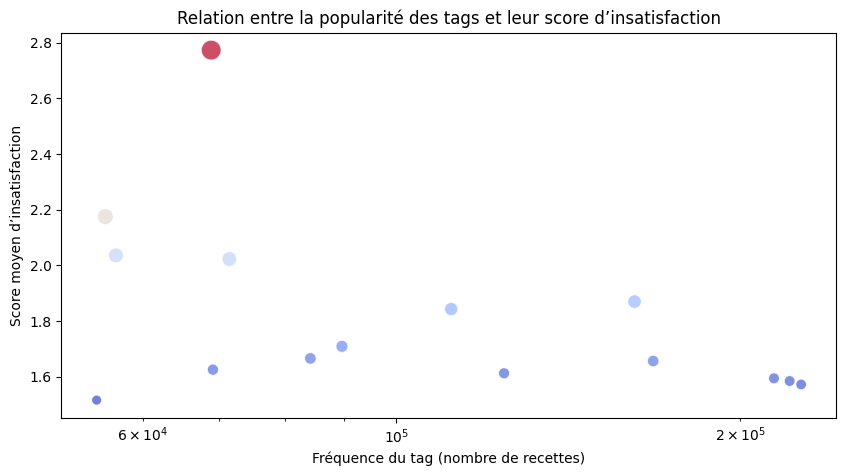

In [129]:
fig, ax1 = plt.subplots(figsize=(10,5))

sns.scatterplot(
    data=combined,
    x="popularity",
    y="mean_negative_score",
    hue="mean_negative_score",
    palette="coolwarm",
    size="mean_negative_score",
    sizes=(50, 200),
    alpha=0.7,
    ax=ax1
)

plt.title("Relation entre la popularité des tags et leur score d’insatisfaction")
plt.xlabel("Fréquence du tag (nombre de recettes)")
plt.ylabel("Score moyen d’insatisfaction")
plt.xscale("log")
plt.legend([],[], frameon=False)
plt.show()


On observe que certains tags très fréquents (comme dietary, main-dish) ont un score d’insatisfaction moyen autour de 2, ce qui indique qu’ils sont à la fois populaires et moyennement critiqués.

En revanche, equipment est peu fréquent mais très critiqué (score proche de 2.8).

Cela signifie que la popularité n’est pas forcément liée à la satisfaction : un tag peut être très commun et pourtant globalement apprécié, ou rare mais très mal noté.

In [134]:
nutri_cols = ["calories", "total fat", "sugar", "sodium", "protein", "saturated fat", "carbohydrates"]

corrs = merged_df[nutri_cols + ["negative_score"]].corr(method="spearman")["negative_score"].sort_values(ascending=False)
print(corrs)


negative_score    1.000000
sodium            0.032010
protein           0.029286
carbohydrates     0.012988
calories          0.002276
saturated fat    -0.001603
sugar            -0.009996
total fat        -0.010451
Name: negative_score, dtype: float64


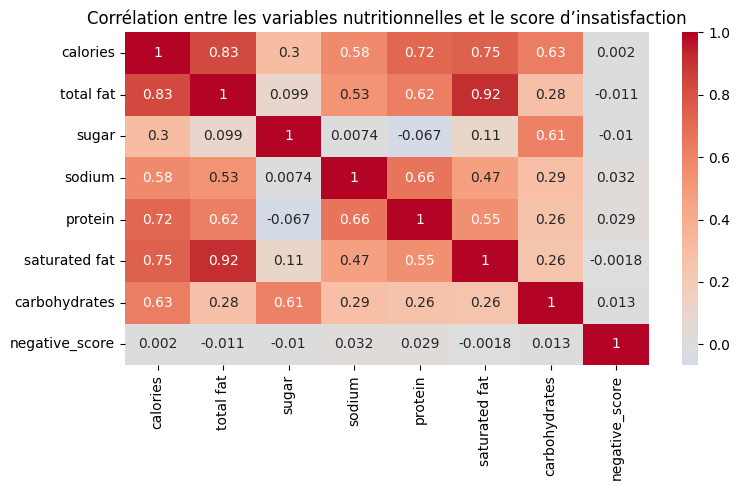

In [133]:
plt.figure(figsize=(8,5))
sns.heatmap(df[nutri_cols + ["negative_score"]].corr(method="spearman"), annot=True, cmap="coolwarm", center=0)
plt.title("Corrélation entre les variables nutritionnelles et le score d’insatisfaction")
plt.tight_layout()
plt.show()


Les caractéristiques nutritionnelles (calories, sucres, graisses, protéines, etc.) n’ont pas d’influence directe sur la perception ou la satisfaction des utilisateurs.

Que la recette soit grasse, sucrée ou salée, cela n’affecte ni le nombre d’avis négatifs, ni le score global d’insatisfaction.

C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_10552\4199454825.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="steps_group", y="negative_score", ci=None, palette="crest", edgecolor="black")
C:\Users\ABDILLAHIOMARDJAMA\AppData\Local\Temp\ipykernel_10552\4199454825.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="steps_group", y="negative_score", ci=None, palette="crest", edgecolor="black")


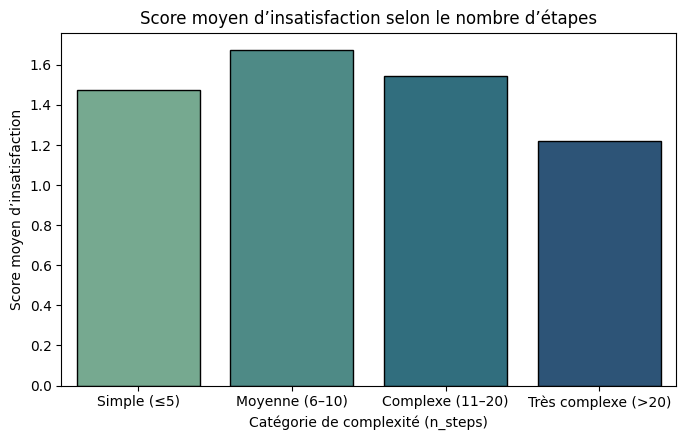

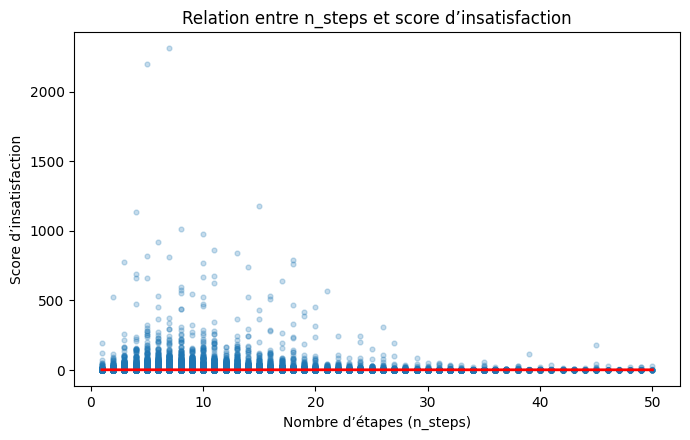

Corrélation Spearman (n_steps ~ negative_score): -0.002
Corrélation Spearman (n_steps ~ negative_reviews): 0.000


In [136]:
# On part du DataFrame df avec: n_steps, negative_score, negative_reviews
data = df.copy()

# (1) Bornes raisonnables pour éviter que quelques recettes extrêmes écrasent les graphes
data = data[(data["n_steps"] > 0) & (data["n_steps"] <= 50)].copy()

# (2) Catégoriser la complexité par nombre d’étapes
bins = [0, 5, 10, 20, 50]
labels = ["Simple (≤5)", "Moyenne (6–10)", "Complexe (11–20)", "Très complexe (>20)"]
data["steps_group"] = pd.cut(data["n_steps"], bins=bins, labels=labels, right=True, include_lowest=True)

# --- A. Comparaison par groupes (moyenne du score)
plt.figure(figsize=(7,4.5))
sns.barplot(data=data, x="steps_group", y="negative_score", ci=None, palette="crest", edgecolor="black")
plt.title("Score moyen d’insatisfaction selon le nombre d’étapes")
plt.xlabel("Catégorie de complexité (n_steps)")
plt.ylabel("Score moyen d’insatisfaction")
plt.tight_layout()
plt.show()

# --- B. Relation continue (sans catégoriser) + corrélation
plt.figure(figsize=(7,4.5))
sns.regplot(
    data=data, x="n_steps", y="negative_score",
    scatter_kws={"alpha":0.25, "s":12}, line_kws={"color":"red", "lw":2}
)
plt.title("Relation entre n_steps et score d’insatisfaction")
plt.xlabel("Nombre d’étapes (n_steps)")
plt.ylabel("Score d’insatisfaction")
plt.tight_layout()
plt.show()

# Corrélation de Spearman (monotone, robuste aux non-linéarités)
rho = data["n_steps"].corr(data["negative_score"], method="spearman")
print(f"Corrélation Spearman (n_steps ~ negative_score): {rho:.3f}")

# (Option utile) même analyse sur le volume d’avis négatifs
rho_neg = data["n_steps"].corr(data["negative_reviews"], method="spearman")
print(f"Corrélation Spearman (n_steps ~ negative_reviews): {rho_neg:.3f}")
